In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import statsmodels.formula.api as smf

# Target: measure the relationship between the change of housing rent price and entropy index of income_level groups

___

# 1.Data cleaning

# 1.1 clean dataset
This dataset is exported from Geolytics: Neighborhood Change Database (NACD)
(http://demographics.geolytics.com/ncdb2010/default.aspx)


### the dataset has been uploaded on:
 https://github.com/picniclin/NYC_yl5240/blob/master/geolytics_NYC_census_1990-2010.csv
 
or
https://drive.google.com/a/nyu.edu/file/d/0B2HY61hRpF-jV21KSTVsbi1wS3M/view?usp=sharing

In [2]:
df = pd.read_csv('geolytics_NYC_census_1990-2010.csv')

In [3]:
df.shape

(2168, 146)

In [4]:
df.head()

,AREAKEY,STATE,STUSAB,INTPTLAT,INTPTLON,TCH_90_10,TCH_00_10,ZCTA5,TRCTPOP9,POVRAT9N,...,THY01001A,THY01251A,THY01501A,THY02001A,THY0M201A,MDHHY1A,MDVALHS1A,MCSMORT1A,MCSNMOR1A,MDGRENT1A
0,36005000100,36,NY,40.793492,-73.883532,0,0,11370.0,14303,0,...,0,0,0,0,0,0,0,0,0,0
1,36005000200,36,NY,40.804573,-73.856859,3,3,10473.0,2907,411,...,152,203,48,68,11,59826,392500,2661,650,1273
2,36005000400,36,NY,40.808915,-73.850488,4,4,10473.0,2260,225,...,255,97,161,96,73,71968,393700,2206,679,1330
3,36005001600,36,NY,40.818848,-73.858076,0,0,10473.0,5254,893,...,171,20,38,20,0,30355,378100,2500,649,823
4,36005001900,36,NY,40.800999,-73.909373,4,4,10454.0,1575,797,...,14,19,21,0,0,25093,0,0,539,870


In [5]:
list(df.columns)

['AREAKEY',
 'STATE',
 'STUSAB',
 'INTPTLAT',
 'INTPTLON',
 'TCH_90_10',
 'TCH_00_10',
 'ZCTA5',
 'TRCTPOP9',
 'POVRAT9N',
 'POVRAT9',
 'FAVINC9',
 'MDFAMY9',
 'FALTY109',
 'FALT159',
 'FALT209',
 'FALT259',
 'FALT309',
 'FALT359',
 'FALT409',
 'FALT499',
 'FALT609A',
 'FALT759A',
 'FALT1009',
 'FALT1259',
 'FALT1509',
 'FALTMXB9',
 'AVHHIN9',
 'MDHHY9',
 'OCCHU9',
 'VACHU9',
 'RNTOCC9',
 'OWNOCC9',
 'SPRNTOC9',
 'SPOWNOC9',
 'PRSOCU9',
 'PRSOWNU9',
 'PRSRNTU9',
 'MDVALHS9',
 'MCSMORT9',
 'MCSNMOR9',
 'MDGRENT9',
 'TRCTPOP0',
 'POVRAT0N',
 'POVRAT0',
 'FAVINC0',
 'MDFAMY0',
 'FAY0100',
 'FAY0150',
 'FAY0200',
 'FAY0250',
 'FAY0300',
 'FAY0350',
 'FAY0400',
 'FAY0450',
 'FAY0500',
 'FAY0600',
 'FAY0750',
 'FAY01000',
 'FAY01250',
 'FAY01500',
 'FAY02000',
 'FAY0M200',
 'AVHHIN0',
 'THY0100',
 'THY0150',
 'THY0200',
 'THY0250',
 'THY0300',
 'THY0350',
 'THY0400',
 'THY0450',
 'THY0500',
 'THY0600',
 'THY0750',
 'THY01000',
 'THY01250',
 'THY01500',
 'THY02000',
 'THY0M200',
 'MDHHY0',
 '

## make the column names readable

In [6]:
cols = df.columns.str.replace('TRCTPOP', 'pop')\
            .str.replace('MDFAMY','median_inc_fam_')\
            .str.replace('FAVINC', 'ave_inc_fam_')\
            .str.replace('MDHHY', 'median_inc_hh_')\
            .str.replace('AVHHIN', 'ave_inc_hh_')\
            .str.replace('FALTY', 'fam_inc_')\
            .str.replace('FALT', 'fam_inc_')\
            .str.replace('MXB', 'max_')\
            .str.replace('FAY0', 'fam_inc_')\
            .str.replace('fam_inc_M', 'fam_inc_max_')\
            .str.replace('THY0', 'hh_inc_' )\
            .str.replace('hh_inc_M', 'hh_inc_max_')\
            .str.replace('MDVALHS','median_house_value_')\
            .str.replace('MDGRENT', 'median_rent_' )\
            .str.replace('MCSMORT', 'owner_cost_mo_' )\
            .str.replace('MCSNMOR', 'owner_cost_no_mo_' )\
            .str.replace('OCCHU', 'occ_')\
            .str.replace('VACHU', 'vacant_')\
            .str.replace('RNTOCC','renter_occ_')\
            .str.replace('OWNOCC', 'owner_occ_')\
            .str.replace('SPRNTOC', 'spec_renter_occ_')\
            .str.replace('SPOWNOC', 'spec_owner_occ_')\
            .str.replace('PRSOCU', 'person_occ_')\
            .str.replace('PRSOWNU', 'person_owner_occ_')\
            .str.replace('PRSRNTU', 'person_renter_occ_')\
            .str.replace('POVRAT','poverty')\
            .str.replace('1A', '1')\
            .str.replace('9A', '9')
            
cols

Index([u'AREAKEY', u'STATE', u'STUSAB', u'INTPTLAT', u'INTPTLON', u'TCH_90_10',
       u'TCH_00_10', u'ZCTA5', u'pop9', u'poverty9N',
       ...
       u'hh_inc_1001', u'hh_inc_1251', u'hh_inc_1501', u'hh_inc_2001',
       u'hh_inc_max_201', u'median_inc_hh_1', u'median_house_value_1',
       u'owner_cost_mo_1', u'owner_cost_no_mo_1', u'median_rent_1'],
      dtype='object', length=146)

In [7]:
df.columns = cols

df.rename(columns = {'AREAKEY' : 'census_tract',
                     'STATE':'state','STUSAB':'abb.',
                     'TCH_90_10':'tract_change_90', 'TCH_00_10':'tract_change_00',
                    'INTPTLAT':'lat', 'INTPTLON':'lon'}, inplace = True)
df.columns

Index([u'census_tract', u'state', u'abb.', u'lat', u'lon', u'tract_change_90',
       u'tract_change_00', u'ZCTA5', u'pop9', u'poverty9N',
       ...
       u'hh_inc_1001', u'hh_inc_1251', u'hh_inc_1501', u'hh_inc_2001',
       u'hh_inc_max_201', u'median_inc_hh_1', u'median_house_value_1',
       u'owner_cost_mo_1', u'owner_cost_no_mo_1', u'median_rent_1'],
      dtype='object', length=146)

In [8]:
df = df.dropna()
df.ZCTA5 = df.ZCTA5.astype('int')
df.shape

(2157, 146)

In [9]:
## delete the observation, i.e. census tract, with 0 median rent or 0 median families income
df = df[~((df.median_rent_0 == 0)| (df.median_rent_9 == 0)|(df.median_rent_1 == 0)|\
         (df.median_inc_fam_9 == 0)| (df.median_inc_fam_9 == 0)|(df.median_inc_fam_1 == 0))]
## drop the redundant columns
df.drop(['state', 'abb.','tract_change_90','tract_change_00'], axis = 1, inplace = True)
df.head()

,census_tract,lat,lon,ZCTA5,pop9,poverty9N,poverty9,ave_inc_fam_9,median_inc_fam_9,fam_inc_109,...,hh_inc_1001,hh_inc_1251,hh_inc_1501,hh_inc_2001,hh_inc_max_201,median_inc_hh_1,median_house_value_1,owner_cost_mo_1,owner_cost_no_mo_1,median_rent_1
1,36005000200,40.804573,-73.856859,10473,2907,411,0.142067,45267.28710,38711,29,...,152,203,48,68,11,59826,392500,2661,650,1273
2,36005000400,40.808915,-73.850488,10473,2260,225,0.100089,43694.20068,40484,19,...,255,97,161,96,73,71968,393700,2206,679,1330
3,36005001600,40.818848,-73.858076,10473,5254,893,0.179245,30042.84776,24732,142,...,171,20,38,20,0,30355,378100,2500,649,823
4,36005001900,40.800999,-73.909373,10454,1575,797,0.506032,23377.47813,24823,50,...,14,19,21,0,0,25093,0,0,539,870
5,36005002000,40.817580,-73.866096,10473,9110,3423,0.375741,25062.06250,18762,284,...,180,161,0,45,12,24939,398100,2185,715,455


In [10]:
df.shape

(2089, 142)

## 1.2 find the PUMA, NAT information for each census tract

### the CensusTract/NTA/PUMA Equivalencies table could be found on this [link](https://www1.nyc.gov/site/planning/data-maps/nyc-population/geographic-reference.page)
 the downloaded linkage is https://www1.nyc.gov/assets/planning/download/office/data-maps/nyc-population/census2010/nyc2010census_tabulation_equiv.xlsx
 
This xlsx includes two tables. Split it into two csv by excel.
### The two csv files have been uploaded on:
https://github.com/picniclin/NYC_yl5240


In [11]:
df_conv1 = pd.read_csv('2010CensusTract_PUMA_NTA.csv')
df_conv2 = pd.read_csv('2010PUMA_NTA.csv')

In [12]:
## df_conv1 is the conversion table between census tract and PUMA/NTA
df_conv1.head()

,Borough,2010CensusTract,PUMA,NTA_Code,NTA_Name
0,Bronx,31000,3704,BX31,Allerton-Pelham Gardens
1,Bronx,31200,3704,BX31,Allerton-Pelham Gardens
2,Bronx,31400,3704,BX31,Allerton-Pelham Gardens
3,Bronx,31600,3704,BX31,Allerton-Pelham Gardens
4,Bronx,31800,3704,BX31,Allerton-Pelham Gardens


In [13]:
## df_conv2 is the conversion table between PUMA and NTA
df_conv2.head()

,Borough,PUMA Code,PUMA_CommunityDistrict,NTA _Code,NTA_Name
0,Bronx,3701,BX Community District 8,BX22,North Riverdale-Fieldston-Riverdale
1,Bronx,3701,BX Community District 8,BX28,Van Cortlandt Village
2,Bronx,3701,BX Community District 8,BX29,Spuyten Duyvil-Kingsbridge
3,Bronx,3702,BX Community District 12,BX03,Eastchester-Edenwald-Baychester
4,Bronx,3702,BX Community District 12,BX44,Williamsbridge-Olinville


In [14]:
len(df_conv1), len(df_conv2)

(2168, 219)

In [15]:
## In df_conv2, we could extract the PUMA list, including PUMA code and PUMA_CommunityDistrict
df_PUMA = df_conv2.iloc[:,1:3].drop_duplicates().reset_index(drop = True)
df_PUMA

,PUMA Code,PUMA_CommunityDistrict
0,3701,BX Community District 8
1,3702,BX Community District 12
2,3703,BX Community District 10
3,3704,BX Community District 11
4,3705,BX Community Districts 3 & 6
5,3706,BX Community District 7
6,3707,BX Community District 5
7,3708,BX Community District 4
8,3709,BX Community District 9
9,3710,BX Community Districts 1 & 2


In [16]:
# df_conv3 is .... 
df_conv3 = pd.DataFrame([['Bronx', '36005'],['Brooklyn','36047'],['Manhattan','36061'], 
              ['Queens','36081'], ['Staten Island', '36085']], columns=['Borough','BroCode'])
df_conv3

,Borough,BroCode
0,Bronx,36005
1,Brooklyn,36047
2,Manhattan,36061
3,Queens,36081
4,Staten Island,36085


In [17]:
df_conv1.head()

,Borough,2010CensusTract,PUMA,NTA_Code,NTA_Name
0,Bronx,31000,3704,BX31,Allerton-Pelham Gardens
1,Bronx,31200,3704,BX31,Allerton-Pelham Gardens
2,Bronx,31400,3704,BX31,Allerton-Pelham Gardens
3,Bronx,31600,3704,BX31,Allerton-Pelham Gardens
4,Bronx,31800,3704,BX31,Allerton-Pelham Gardens


In [18]:
df_conv2.head()

,Borough,PUMA Code,PUMA_CommunityDistrict,NTA _Code,NTA_Name
0,Bronx,3701,BX Community District 8,BX22,North Riverdale-Fieldston-Riverdale
1,Bronx,3701,BX Community District 8,BX28,Van Cortlandt Village
2,Bronx,3701,BX Community District 8,BX29,Spuyten Duyvil-Kingsbridge
3,Bronx,3702,BX Community District 12,BX03,Eastchester-Edenwald-Baychester
4,Bronx,3702,BX Community District 12,BX44,Williamsbridge-Olinville


In [19]:
df_tract = df_conv1.merge(df_conv2.rename(columns={'PUMA Code':'PUMA'}), on = ['Borough'])
df_tract = df_tract.merge(df_conv3, on = 'Borough')

df_tract.head()

,Borough,2010CensusTract,PUMA,NTA_Code,NTA_Name_x,PUMA Code,PUMA_CommunityDistrict,NTA _Code,NTA_Name_y,BroCode
0,Bronx,31000,3704,BX31,Allerton-Pelham Gardens,3701,BX Community District 8,BX22,North Riverdale-Fieldston-Riverdale,36005
1,Bronx,31000,3704,BX31,Allerton-Pelham Gardens,3701,BX Community District 8,BX28,Van Cortlandt Village,36005
2,Bronx,31000,3704,BX31,Allerton-Pelham Gardens,3701,BX Community District 8,BX29,Spuyten Duyvil-Kingsbridge,36005
3,Bronx,31000,3704,BX31,Allerton-Pelham Gardens,3702,BX Community District 12,BX03,Eastchester-Edenwald-Baychester,36005
4,Bronx,31000,3704,BX31,Allerton-Pelham Gardens,3702,BX Community District 12,BX44,Williamsbridge-Olinville,36005


In [20]:
df_tract['census_tract']  = (df_tract.BroCode +\
                        df_tract['2010CensusTract'].apply(lambda x : str(x).zfill(6))).astype(int)

In [21]:
df_tract = df_tract.iloc[:,[0,-1,2,-3,3,4]]
df_tract.head()

,Borough,census_tract,PUMA,NTA_Name_y,NTA_Code,NTA_Name_x
0,Bronx,36005031000,3704,North Riverdale-Fieldston-Riverdale,BX31,Allerton-Pelham Gardens
1,Bronx,36005031000,3704,Van Cortlandt Village,BX31,Allerton-Pelham Gardens
2,Bronx,36005031000,3704,Spuyten Duyvil-Kingsbridge,BX31,Allerton-Pelham Gardens
3,Bronx,36005031000,3704,Eastchester-Edenwald-Baychester,BX31,Allerton-Pelham Gardens
4,Bronx,36005031000,3704,Williamsbridge-Olinville,BX31,Allerton-Pelham Gardens


In [22]:
df_tract.shape

(115193, 6)

In [23]:
# check does the conversion table contain all the census tract in dataset df
len(set(df['census_tract']) - set(df_tract['census_tract'])), \
len(set(df_tract['census_tract']) - set(df['census_tract']) ), \
len(set(df['census_tract']))

(0, 79, 2089)

#### Yes, the conversion table contain all the census tract in dataset df.

## 1.3 conbine the conversion table into dataset, to add the PUMA and NTA information

In [24]:
df_all = df.merge(df_tract, on = 'census_tract')

df_all.head()

,census_tract,lat,lon,ZCTA5,pop9,poverty9N,poverty9,ave_inc_fam_9,median_inc_fam_9,fam_inc_109,...,median_inc_hh_1,median_house_value_1,owner_cost_mo_1,owner_cost_no_mo_1,median_rent_1,Borough,PUMA,NTA_Name_y,NTA_Code,NTA_Name_x
0,36005000200,40.804573,-73.856859,10473,2907,411,0.142067,45267.2871,38711,29,...,59826,392500,2661,650,1273,Bronx,3709,North Riverdale-Fieldston-Riverdale,BX09,Soundview-Castle Hill-Clason Point-Harding Park
1,36005000200,40.804573,-73.856859,10473,2907,411,0.142067,45267.2871,38711,29,...,59826,392500,2661,650,1273,Bronx,3709,Van Cortlandt Village,BX09,Soundview-Castle Hill-Clason Point-Harding Park
2,36005000200,40.804573,-73.856859,10473,2907,411,0.142067,45267.2871,38711,29,...,59826,392500,2661,650,1273,Bronx,3709,Spuyten Duyvil-Kingsbridge,BX09,Soundview-Castle Hill-Clason Point-Harding Park
3,36005000200,40.804573,-73.856859,10473,2907,411,0.142067,45267.2871,38711,29,...,59826,392500,2661,650,1273,Bronx,3709,Eastchester-Edenwald-Baychester,BX09,Soundview-Castle Hill-Clason Point-Harding Park
4,36005000200,40.804573,-73.856859,10473,2907,411,0.142067,45267.2871,38711,29,...,59826,392500,2661,650,1273,Bronx,3709,Williamsbridge-Olinville,BX09,Soundview-Castle Hill-Clason Point-Harding Park


In [25]:
# change the colomn location of df_cov's colomns
df_all = pd.concat([df_all.iloc[:,[0]], df_all.iloc[:,-5:], df_all.iloc[:,1:-5]], axis = 1)
df_all.head()

,census_tract,Borough,PUMA,NTA_Name_y,NTA_Code,NTA_Name_x,lat,lon,ZCTA5,pop9,...,hh_inc_1001,hh_inc_1251,hh_inc_1501,hh_inc_2001,hh_inc_max_201,median_inc_hh_1,median_house_value_1,owner_cost_mo_1,owner_cost_no_mo_1,median_rent_1
0,36005000200,Bronx,3709,North Riverdale-Fieldston-Riverdale,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473,2907,...,152,203,48,68,11,59826,392500,2661,650,1273
1,36005000200,Bronx,3709,Van Cortlandt Village,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473,2907,...,152,203,48,68,11,59826,392500,2661,650,1273
2,36005000200,Bronx,3709,Spuyten Duyvil-Kingsbridge,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473,2907,...,152,203,48,68,11,59826,392500,2661,650,1273
3,36005000200,Bronx,3709,Eastchester-Edenwald-Baychester,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473,2907,...,152,203,48,68,11,59826,392500,2661,650,1273
4,36005000200,Bronx,3709,Williamsbridge-Olinville,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473,2907,...,152,203,48,68,11,59826,392500,2661,650,1273


In [26]:
df_all.shape, df.shape

((110925, 147), (2089, 142))

### We have 2089 census tracts for analysis.

-----

# 2. split the dataset into several sub-tables

## 2.1 Geographies data table
according to http://guides.newman.baruch.cuny.edu/nyc_data/nbhoods, New York City neighborhood census data could use Public Use Microdata Areas (PUMAs).


In [27]:
# the sub-table of census tract information, including census tract id, latitude, longitude, and ZCTA.
# df_dataset_tract is part of df_tract , accrdance with the observations of dataset
# also three more variables than df_tract: lat, lon, ZCTA5 
df_dataset_tract = df_all.iloc[:, :9]
df_dataset_tract.head()

,census_tract,Borough,PUMA,NTA_Name_y,NTA_Code,NTA_Name_x,lat,lon,ZCTA5
0,36005000200,Bronx,3709,North Riverdale-Fieldston-Riverdale,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473
1,36005000200,Bronx,3709,Van Cortlandt Village,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473
2,36005000200,Bronx,3709,Spuyten Duyvil-Kingsbridge,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473
3,36005000200,Bronx,3709,Eastchester-Edenwald-Baychester,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473
4,36005000200,Bronx,3709,Williamsbridge-Olinville,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473


In [28]:
df_dataset_tract.shape

(110925, 9)

## 2.2 Tables for different years

In [29]:
df_1990 = pd.concat([df.iloc[:,[0]], df.iloc[:, 8:42]],axis =1)
df_2000 = pd.concat([df.iloc[:,[0]], df.iloc[:, 42:94]],axis =1)
df_2010 = pd.concat([df.iloc[:,[0]], df.iloc[:, 94:]],axis =1)
df_1990.shape, df_2000.shape, df_2010.shape

((2089, 35), (2089, 53), (2089, 49))

In [30]:
df_1990.head()

,census_tract,median_inc_fam_9,fam_inc_109,fam_inc_159,fam_inc_209,fam_inc_259,fam_inc_309,fam_inc_359,fam_inc_409,fam_inc_499,...,person_owner_occ_9,person_renter_occ_9,median_house_value_9,owner_cost_mo_9,owner_cost_no_mo_9,median_rent_9,pop0,poverty0N,poverty0,ave_inc_fam_0
1,36005000200,38711,29,29,12,31,20,32,31,84,...,1845,1055,136500,1006,204,742,3505,703,0.202477,50763.54348
2,36005000400,40484,19,17,11,34,1,50,50,89,...,1662,593,163234,1066,301,535,3354,437,0.131508,48306.41829
3,36005001600,24732,142,28,124,84,41,165,39,161,...,885,4116,156800,805,302,466,5208,1112,0.221735,36442.53563
4,36005001900,24823,50,39,0,0,3,0,0,67,...,467,1002,48868,1394,82,422,1613,556,0.405248,31360.47431
5,36005002000,18762,284,201,107,60,74,131,95,203,...,1719,7380,185400,1237,193,298,9101,4118,0.459291,26817.80645


## 2.3 Income Tables

In [31]:
# the sub-table of median/average families/households income
df_income = df.loc[:,df.columns[(df.columns == 'census_tract') |\
                              (df.columns.str.startswith('median_inc_')) |\
                              (df.columns.str.startswith('ave_inc_'))]]
df_income.columns

Index([u'census_tract', u'ave_inc_fam_9', u'median_inc_fam_9', u'ave_inc_hh_9',
       u'median_inc_hh_9', u'ave_inc_fam_0', u'median_inc_fam_0',
       u'ave_inc_hh_0', u'median_inc_hh_0', u'ave_inc_fam_1',
       u'median_inc_fam_1', u'ave_inc_hh_1', u'median_inc_hh_1'],
      dtype='object')

In [32]:
df_income.shape

(2089, 13)

In [33]:
df_income.describe()

,census_tract,ave_inc_fam_9,median_inc_fam_9,ave_inc_hh_9,median_inc_hh_9,ave_inc_fam_0,median_inc_fam_0,ave_inc_hh_0,median_inc_hh_0,ave_inc_fam_1,median_inc_fam_1,ave_inc_hh_1,median_inc_hh_1
count,2.089000e+03,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.00000,2089.000000,2089.000000,2089.000000
mean,3.605455e+10,46240.797301,37689.401628,39246.703235,31309.411202,63576.869583,48874.026807,54229.582025,40628.821446,85376.28443,66207.958353,72345.813173,54703.689325
std,2.594637e+07,28606.446820,18760.425689,19565.189172,13562.873547,45058.370638,28645.098401,29038.210224,18527.299709,62564.07724,39910.826453,40603.704702,25923.948148
min,3.600500e+10,0.000000,86.000000,0.000000,5360.000000,16376.090910,7354.000000,12747.077320,7863.000000,0.00000,8542.000000,0.000000,8694.000000
25%,3.604702e+10,30501.042240,24924.000000,27864.930300,21862.000000,40513.116200,30724.000000,37683.585970,27976.000000,52010.32700,40022.000000,48876.596000,36299.000000
50%,3.604712e+10,41866.927540,36218.000000,36208.754250,30417.000000,53041.525420,42590.000000,48376.129030,37936.000000,70564.74300,56726.000000,64120.604000,51127.000000
75%,3.608103e+10,53084.721130,46843.000000,46187.374640,39697.000000,69321.465430,58977.000000,62046.691640,50806.000000,93098.66200,80125.000000,82035.096000,68026.000000
max,3.608503e+10,327320.474100,150001.000000,248923.005700,147567.000000,450967.828700,200001.000000,337238.297900,174119.000000,636204.42600,250001.000000,464390.618000,232768.000000


### Since there is no household income in 1990, we prefer to choose family income data as income data

In [34]:
df_family_income = df_all.loc[:,df_all.columns[(df_all.columns == 'census_tract') | \
                                       (df_all.columns == 'PUMA')|\
                                       df_all.columns.str.startswith('fam_inc_')]]
df_family_income.head()

,census_tract,PUMA,fam_inc_109,fam_inc_159,fam_inc_209,fam_inc_259,fam_inc_309,fam_inc_359,fam_inc_409,fam_inc_499,...,fam_inc_401,fam_inc_451,fam_inc_501,fam_inc_601,fam_inc_751,fam_inc_1001,fam_inc_1251,fam_inc_1501,fam_inc_2001,fam_inc_max_201
0,36005000200,3709,29,29,12,31,20,32,31,84,...,36,142,24,77,49,136,221,60,38,0
1,36005000200,3709,29,29,12,31,20,32,31,84,...,36,142,24,77,49,136,221,60,38,0
2,36005000200,3709,29,29,12,31,20,32,31,84,...,36,142,24,77,49,136,221,60,38,0
3,36005000200,3709,29,29,12,31,20,32,31,84,...,36,142,24,77,49,136,221,60,38,0
4,36005000200,3709,29,29,12,31,20,32,31,84,...,36,142,24,77,49,136,221,60,38,0


In [35]:
df_family_income

,census_tract,PUMA,fam_inc_109,fam_inc_159,fam_inc_209,fam_inc_259,fam_inc_309,fam_inc_359,fam_inc_409,fam_inc_499,...,fam_inc_401,fam_inc_451,fam_inc_501,fam_inc_601,fam_inc_751,fam_inc_1001,fam_inc_1251,fam_inc_1501,fam_inc_2001,fam_inc_max_201
0,36005000200,3709,29,29,12,31,20,32,31,84,...,36,142,24,77,49,136,221,60,38,0
1,36005000200,3709,29,29,12,31,20,32,31,84,...,36,142,24,77,49,136,221,60,38,0
2,36005000200,3709,29,29,12,31,20,32,31,84,...,36,142,24,77,49,136,221,60,38,0
3,36005000200,3709,29,29,12,31,20,32,31,84,...,36,142,24,77,49,136,221,60,38,0
4,36005000200,3709,29,29,12,31,20,32,31,84,...,36,142,24,77,49,136,221,60,38,0
5,36005000200,3709,29,29,12,31,20,32,31,84,...,36,142,24,77,49,136,221,60,38,0
6,36005000200,3709,29,29,12,31,20,32,31,84,...,36,142,24,77,49,136,221,60,38,0
7,36005000200,3709,29,29,12,31,20,32,31,84,...,36,142,24,77,49,136,221,60,38,0
8,36005000200,3709,29,29,12,31,20,32,31,84,...,36,142,24,77,49,136,221,60,38,0
9,36005000200,3709,29,29,12,31,20,32,31,84,...,36,142,24,77,49,136,221,60,38,0


In [36]:
df_family_income.columns

Index([u'census_tract', u'PUMA', u'fam_inc_109', u'fam_inc_159',
       u'fam_inc_209', u'fam_inc_259', u'fam_inc_309', u'fam_inc_359',
       u'fam_inc_409', u'fam_inc_499', u'fam_inc_609', u'fam_inc_759',
       u'fam_inc_1009', u'fam_inc_1259', u'fam_inc_1509', u'fam_inc_max_9',
       u'fam_inc_100', u'fam_inc_150', u'fam_inc_200', u'fam_inc_250',
       u'fam_inc_300', u'fam_inc_350', u'fam_inc_400', u'fam_inc_450',
       u'fam_inc_500', u'fam_inc_600', u'fam_inc_750', u'fam_inc_1000',
       u'fam_inc_1250', u'fam_inc_1500', u'fam_inc_2000', u'fam_inc_max_200',
       u'fam_inc_101', u'fam_inc_151', u'fam_inc_201', u'fam_inc_251',
       u'fam_inc_301', u'fam_inc_351', u'fam_inc_401', u'fam_inc_451',
       u'fam_inc_501', u'fam_inc_601', u'fam_inc_751', u'fam_inc_1001',
       u'fam_inc_1251', u'fam_inc_1501', u'fam_inc_2001', u'fam_inc_max_201'],
      dtype='object')

In [37]:
# the tables of different groups of families income level
df_family_income_1990 = df_family_income.loc[:,
                        df_family_income.columns[(df_family_income.columns == 'census_tract') |\
                                                    df_family_income.columns.str.endswith('9')]]

df_family_income_2000 = df_family_income.loc[:,
                        df_family_income.columns[(df_family_income.columns == 'census_tract') |\
                                                    df_family_income.columns.str.endswith('0')]]

df_family_income_2010 = df_family_income.loc[:,
                        df_family_income.columns[(df_family_income.columns == 'census_tract') |\
                                                    df_family_income.columns.str.endswith('1')]]

 
df_family_income_1990.shape, df_family_income_2000.shape, df_family_income_2010.shape

((110925, 15), (110925, 17), (110925, 17))

In [38]:
df_family_income_1990.head()

,census_tract,fam_inc_109,fam_inc_159,fam_inc_209,fam_inc_259,fam_inc_309,fam_inc_359,fam_inc_409,fam_inc_499,fam_inc_609,fam_inc_759,fam_inc_1009,fam_inc_1259,fam_inc_1509,fam_inc_max_9
0,36005000200,29,29,12,31,20,32,31,84,75,59,68,35,18,2
1,36005000200,29,29,12,31,20,32,31,84,75,59,68,35,18,2
2,36005000200,29,29,12,31,20,32,31,84,75,59,68,35,18,2
3,36005000200,29,29,12,31,20,32,31,84,75,59,68,35,18,2
4,36005000200,29,29,12,31,20,32,31,84,75,59,68,35,18,2


## 2.4 Housing tables, including data of house value and rent

In [39]:
# the sub-table of housing price and rent
df_house = df.loc[:,df.columns[(df.columns == 'census_tract') |\
                              (df.columns.str.startswith('median_rent_')) |\
                              (df.columns.str.startswith('median_house_'))]]
df_house.head()

,census_tract,median_house_value_9,median_rent_9,median_house_value_0,median_rent_0,median_house_value_1,median_rent_1
1,36005000200,136500,742,147500,730,392500,1273
2,36005000400,163234,535,157610,643,393700,1330
3,36005001600,156800,466,177000,558,378100,823
4,36005001900,48868,422,145960,461,0,870
5,36005002000,185400,298,177600,266,398100,455


In [40]:
df_house.shape

(2089, 7)

In [41]:
df_house.describe()

,census_tract,median_house_value_9,median_rent_9,median_house_value_0,median_rent_0,median_house_value_1,median_rent_1
count,2.089000e+03,2089.000000,2089.000000,2.089000e+03,2089.000000,2.089000e+03,2089.000000
mean,3.605455e+10,170909.090953,544.198181,2.233565e+05,753.071326,5.070657e+05,1151.020105
std,2.594637e+07,110359.984751,150.069074,1.826276e+05,231.835763,2.214706e+05,331.293631
min,3.600500e+10,0.000000,140.000000,0.000000e+00,175.000000,0.000000e+00,231.000000
25%,3.604702e+10,118204.000000,453.000000,1.604000e+05,644.000000,3.981000e+05,964.000000
50%,3.604712e+10,171500.000000,531.000000,1.964000e+05,740.000000,4.941000e+05,1120.000000
75%,3.608103e+10,218689.000000,629.000000,2.508000e+05,834.000000,6.275000e+05,1308.000000
max,3.608503e+10,500001.000000,1001.000000,1.000001e+06,2001.000000,1.000001e+06,2001.000000


_____

# 3. Analysis based on census tract

## 1）create the table for relationship analysis

The variables we need are median family income, median rent, families with different income level

## Look at a whole view of income and rent
To compare the 1990 data, we choose the family income, not household income.

In [42]:
df2 = df.loc[:,df.columns[(df.columns == 'census_tract') |\
                          (df.columns.str.startswith('median_inc_fam'))|\
                          (df.columns.str.startswith('median_rent')) ]]

In [43]:
df2.head()

,census_tract,median_inc_fam_9,median_rent_9,median_inc_fam_0,median_rent_0,median_inc_fam_1,median_rent_1
1,36005000200,38711,742,50817,730,58368,1273
2,36005000400,40484,535,41019,643,73148,1330
3,36005001600,24732,466,30104,558,33555,823
4,36005001900,24823,422,23671,461,25489,870
5,36005002000,18762,298,19694,266,30817,455


In [44]:
df2['rent_income_ratio_9'] = df2['median_rent_9'] * 12/df2['median_inc_fam_9']
df2['rent_income_ratio_0'] = df2['median_rent_0'] * 12/df2['median_inc_fam_0']
df2['rent_income_ratio_1'] = df2['median_rent_1'] * 12/df2['median_inc_fam_1']
df2.head()

,census_tract,median_inc_fam_9,median_rent_9,median_inc_fam_0,median_rent_0,median_inc_fam_1,median_rent_1,rent_income_ratio_9,rent_income_ratio_0,rent_income_ratio_1
1,36005000200,38711,742,50817,730,58368,1273,0.230012,0.172383,0.261719
2,36005000400,40484,535,41019,643,73148,1330,0.158581,0.188108,0.218188
3,36005001600,24732,466,30104,558,33555,823,0.226104,0.222429,0.294323
4,36005001900,24823,422,23671,461,25489,870,0.204004,0.233704,0.409588
5,36005002000,18762,298,19694,266,30817,455,0.190598,0.162080,0.177175


In [45]:
df2.describe()

,census_tract,median_inc_fam_9,median_rent_9,median_inc_fam_0,median_rent_0,median_inc_fam_1,median_rent_1,rent_income_ratio_9,rent_income_ratio_0,rent_income_ratio_1
count,2.089000e+03,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000
mean,3.605455e+10,37689.401628,544.198181,48874.026807,753.071326,66207.958353,1151.020105,0.259635,0.214373,0.248931
std,2.594637e+07,18760.425689,150.069074,28645.098401,231.835763,39910.826453,331.293631,2.738330,0.074864,0.100567
min,3.600500e+10,86.000000,140.000000,7354.000000,175.000000,8542.000000,231.000000,0.067760,0.010500,0.042308
25%,3.604702e+10,24924.000000,453.000000,30724.000000,644.000000,40022.000000,964.000000,0.151078,0.164954,0.181756
50%,3.604712e+10,36218.000000,531.000000,42590.000000,740.000000,56726.000000,1120.000000,0.183705,0.204193,0.235058
75%,3.608103e+10,46843.000000,629.000000,58977.000000,834.000000,80125.000000,1308.000000,0.227210,0.253730,0.300615
max,3.608503e+10,150001.000000,1001.000000,200001.000000,2001.000000,250001.000000,2001.000000,125.302326,1.194452,1.298057


## how does the income and rent change between 1990-2010

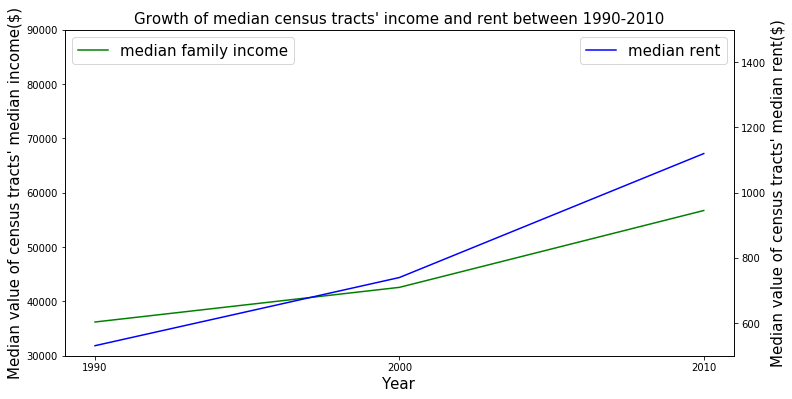

In [46]:
## select the median value of 2089 census tract
fig, ax1 = plt.subplots(figsize = (12, 6))
ax2 = ax1.twinx()
ax1.plot(np.arange(3), df2.median().iloc[[1,3,5]], c = 'g', label = 'median family income')
ax2.plot(np.arange(3), df2.median().iloc[[2,4,6]], c = 'b', label = 'median rent')
ax1.legend(loc = 'upper left', fontsize = 15)
ax2.legend(loc = 'upper right', fontsize = 15)

ax1.set_xlabel('Year', fontsize = 15)
ax1.set_ylabel("Median value of census tracts' median income($)", fontsize = 15)
ax1.set_ylim((30000,90000))

ax2.set_ylabel("Median value of census tracts' median rent($)", fontsize = 15)
ax2.set_ylim((500, 1500))

plt.xticks(np.arange(3), ('1990','2000','2010'))
plt.title("Growth of median census tracts' income and rent between 1990-2010", fontsize = 15)

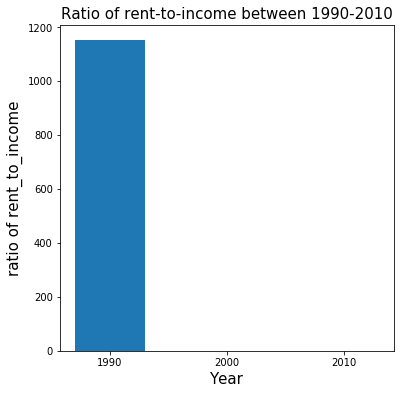

In [47]:
## see how does rent-to-income ratio change
plt.figure(figsize = (6, 6))
plt.bar(np.arange(3), df2.mean()[6:9], width = 0.6)

plt.xticks(np.arange(3), ('1990','2000','2010'))
plt.xlabel('Year', fontsize = 15)
plt.ylabel('ratio of rent_to_income', fontsize = 15)
plt.title('Ratio of rent-to-income between 1990-2010', fontsize = 15)

## Calculate the change of rent between 1990-2000 and 2000-2010

In [48]:
df2['inc_growth_90_00'] = df2.median_inc_fam_0/df2.median_inc_fam_9
df2['inc_growth_00_10'] = df2.median_inc_fam_1/df2.median_inc_fam_0

df2['rent_growth_90_00'] = df2.median_rent_0/df2.median_rent_9
df2['rent_growth_00_10'] = df2.median_rent_1/df2.median_rent_0
df2.head()

,census_tract,median_inc_fam_9,median_rent_9,median_inc_fam_0,median_rent_0,median_inc_fam_1,median_rent_1,rent_income_ratio_9,rent_income_ratio_0,rent_income_ratio_1,inc_growth_90_00,inc_growth_00_10,rent_growth_90_00,rent_growth_00_10
1,36005000200,38711,742,50817,730,58368,1273,0.230012,0.172383,0.261719,1.312728,1.148592,0.983827,1.743836
2,36005000400,40484,535,41019,643,73148,1330,0.158581,0.188108,0.218188,1.013215,1.783271,1.201869,2.068429
3,36005001600,24732,466,30104,558,33555,823,0.226104,0.222429,0.294323,1.217208,1.114636,1.197425,1.474910
4,36005001900,24823,422,23671,461,25489,870,0.204004,0.233704,0.409588,0.953591,1.076803,1.092417,1.887202
5,36005002000,18762,298,19694,266,30817,455,0.190598,0.162080,0.177175,1.049675,1.564791,0.892617,1.710526


In [49]:
df2.describe()

,census_tract,median_inc_fam_9,median_rent_9,median_inc_fam_0,median_rent_0,median_inc_fam_1,median_rent_1,rent_income_ratio_9,rent_income_ratio_0,rent_income_ratio_1,inc_growth_90_00,inc_growth_00_10,rent_growth_90_00,rent_growth_00_10
count,2.089000e+03,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000
mean,3.605455e+10,37689.401628,544.198181,48874.026807,753.071326,66207.958353,1151.020105,0.259635,0.214373,0.248931,2.017393,1.386582,1.394707,1.554580
std,2.594637e+07,18760.425689,150.069074,28645.098401,231.835763,39910.826453,331.293631,2.738330,0.074864,0.100567,32.109538,0.371344,0.243999,0.341645
min,3.600500e+10,86.000000,140.000000,7354.000000,175.000000,8542.000000,231.000000,0.067760,0.010500,0.042308,0.536671,0.210854,0.174825,0.326599
25%,3.604702e+10,24924.000000,453.000000,30724.000000,644.000000,40022.000000,964.000000,0.151078,0.164954,0.181756,1.100910,1.155940,1.272441,1.412500
50%,3.604712e+10,36218.000000,531.000000,42590.000000,740.000000,56726.000000,1120.000000,0.183705,0.204193,0.235058,1.250178,1.336591,1.378641,1.525917
75%,3.608103e+10,46843.000000,629.000000,58977.000000,834.000000,80125.000000,1308.000000,0.227210,0.253730,0.300615,1.426565,1.545935,1.486239,1.655766
max,3.608503e+10,150001.000000,1001.000000,200001.000000,2001.000000,250001.000000,2001.000000,125.302326,1.194452,1.298057,1468.779070,4.714033,4.547727,11.434286


## 2) Calculation of entropy index 
entropy index of different income-level groups for each census tract from 1990 to 2010

entropy index fomular:
https://github.com/picniclin/NYC_yl5240/blob/master/entropy_index_fomular.png

In [50]:
# define entropy index 
def entropy_index(x):
    Q_sum = 0
    for i in x:
        if i == 0:
            Q = 0
        else:
            Q = (-1) * (i/sum(x)) * np.log(i/sum(x))
        Q_sum += Q
    entropy_index = Q_sum/np.log(len(x))
    return entropy_index

In [51]:
# have a try
entropy_index(list(df_family_income_1990.iloc[0,1:]))

nan

In [52]:
# calculate the entropy index of 1990
for i in df_family_income_1990.index:
    df_family_income_1990.loc[i,'entropy_index_9'] = \
                    entropy_index(list(df_family_income_1990.loc[i,'fam_inc_109':'fam_inc_max_9']))

In [53]:
df_family_income_1990.head()

,census_tract,fam_inc_109,fam_inc_159,fam_inc_209,fam_inc_259,fam_inc_309,fam_inc_359,fam_inc_409,fam_inc_499,fam_inc_609,fam_inc_759,fam_inc_1009,fam_inc_1259,fam_inc_1509,fam_inc_max_9,entropy_index_9
0,36005000200,29,29,12,31,20,32,31,84,75,59,68,35,18,2,NaN
1,36005000200,29,29,12,31,20,32,31,84,75,59,68,35,18,2,0.922469
2,36005000200,29,29,12,31,20,32,31,84,75,59,68,35,18,2,0.922469
3,36005000200,29,29,12,31,20,32,31,84,75,59,68,35,18,2,0.922469
4,36005000200,29,29,12,31,20,32,31,84,75,59,68,35,18,2,0.922469


In [54]:
# calculate the entropy index of 2000 and 2010
for i in df_family_income_2000.index:
    df_family_income_2000.loc[i,'entropy_index_0'] = \
                    entropy_index(list(df_family_income_2000.loc[i,'fam_inc_100':'fam_inc_max_200']))

for i in df_family_income_2010.index:
    df_family_income_2010.loc[i,'entropy_index_1'] = \
                    entropy_index(list(df_family_income_2010.loc[i,'fam_inc_101':'fam_inc_max_201']))

In [55]:
df_family_income_1990.shape, df_family_income_2000.shape, df_family_income_2010.shape

((110925, 16), (110925, 18), (110925, 18))

## Table of Census tract entropy index! That's what we need! The milestone!

In [56]:
df_census_entropy = df_dataset_tract.merge(pd.concat([df_family_income_1990.iloc[:,[0,-1]],
                              df_family_income_2000.iloc[:,-1],
                              df_family_income_2010.iloc[:,-1]], axis = 1), on = 'census_tract')

df_census_entropy.head()

,census_tract,Borough,PUMA,NTA_Name_y,NTA_Code,NTA_Name_x,lat,lon,ZCTA5,entropy_index_9,entropy_index_0,entropy_index_1
0,36005000200,Bronx,3709,North Riverdale-Fieldston-Riverdale,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473,NaN,NaN,NaN
1,36005000200,Bronx,3709,North Riverdale-Fieldston-Riverdale,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473,0.922469,0.871427,0.894048
2,36005000200,Bronx,3709,North Riverdale-Fieldston-Riverdale,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473,0.922469,0.871427,0.894048
3,36005000200,Bronx,3709,North Riverdale-Fieldston-Riverdale,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473,0.922469,0.871427,0.894048
4,36005000200,Bronx,3709,North Riverdale-Fieldston-Riverdale,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473,0.922469,0.871427,0.894048


In [57]:
df_census_entropy.shape

(6336275, 12)

In [58]:
df_ingn_brdn = df2.merge(df_census_entropy, on='census_tract')
df_ingn_brdn.head()

,census_tract,median_inc_fam_9,median_rent_9,median_inc_fam_0,median_rent_0,median_inc_fam_1,median_rent_1,rent_income_ratio_9,rent_income_ratio_0,rent_income_ratio_1,...,PUMA,NTA_Name_y,NTA_Code,NTA_Name_x,lat,lon,ZCTA5,entropy_index_9,entropy_index_0,entropy_index_1
0,36005000200,38711,742,50817,730,58368,1273,0.230012,0.172383,0.261719,...,3709,North Riverdale-Fieldston-Riverdale,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473,NaN,NaN,NaN
1,36005000200,38711,742,50817,730,58368,1273,0.230012,0.172383,0.261719,...,3709,North Riverdale-Fieldston-Riverdale,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473,0.922469,0.871427,0.894048
2,36005000200,38711,742,50817,730,58368,1273,0.230012,0.172383,0.261719,...,3709,North Riverdale-Fieldston-Riverdale,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473,0.922469,0.871427,0.894048
3,36005000200,38711,742,50817,730,58368,1273,0.230012,0.172383,0.261719,...,3709,North Riverdale-Fieldston-Riverdale,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473,0.922469,0.871427,0.894048
4,36005000200,38711,742,50817,730,58368,1273,0.230012,0.172383,0.261719,...,3709,North Riverdale-Fieldston-Riverdale,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473,0.922469,0.871427,0.894048


In [59]:
df_ingn_brdn = df_ingn_brdn.groupby(by='PUMA')

In [60]:
df_ingn_brdn = df_ingn_brdn.mean()

In [61]:
len(df_ingn_brdn)

55

In [62]:
df_ingn_brdn = df_ingn_brdn.reset_index()
df_ingn_brdn.head()

,PUMA,census_tract,median_inc_fam_9,median_rent_9,median_inc_fam_0,median_rent_0,median_inc_fam_1,median_rent_1,rent_income_ratio_9,rent_income_ratio_0,...,inc_growth_90_00,inc_growth_00_10,rent_growth_90_00,rent_growth_00_10,lat,lon,ZCTA5,entropy_index_9,entropy_index_0,entropy_index_1
0,3701,3.600503e+10,45086.111111,535.444444,56934.925926,761.222222,75745.518519,1106.407407,0.162171,0.193808,...,1.233558,1.327131,1.427693,1.454321,40.885093,-73.903659,10466.481481,0.870253,0.890936,0.817852
1,3702,3.600504e+10,39170.809524,550.285714,46532.666667,744.952381,59420.214286,1101.809524,0.175063,0.201167,...,1.194408,1.310304,1.363354,1.487604,40.886798,-73.853893,10467.404762,0.840920,0.891249,0.850414
2,3703,3.600502e+10,45072.739130,559.565217,53895.347826,749.478261,69597.347826,1113.608696,0.152800,0.168615,...,1.224843,1.299647,1.339406,1.478587,40.836982,-73.821053,10465.391304,0.848810,0.903423,0.859172
3,3704,3.600503e+10,38131.875000,527.350000,44484.050000,720.775000,60309.550000,1090.000000,0.173955,0.226618,...,1.158262,1.452122,1.378344,1.511322,40.856651,-73.856886,10464.700000,0.852915,0.892008,0.822135
4,3705,3.600503e+10,13367.925000,356.050000,20199.775000,498.550000,26691.825000,812.600000,0.367576,0.309965,...,1.691148,1.386329,1.414653,1.640793,40.840757,-73.891945,10458.175000,0.712305,0.793578,0.820009


(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 6 Text yticklabel objects>)

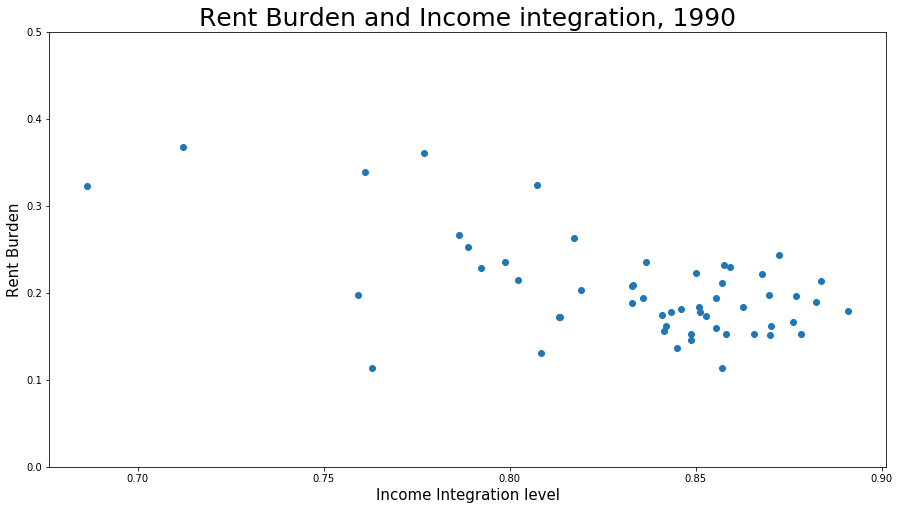

In [63]:
plt.figure(figsize = (15, 8))

plt.plot(df_ingn_brdn['entropy_index_9'],df_ingn_brdn['rent_income_ratio_9'], 'o')
plt.ylim(0,0.5)
plt.xlabel('Income Integration level', fontsize = 15)
plt.ylabel('Rent Burden', fontsize = 15)
plt.title('Rent Burden and Income integration, 1990', fontsize = 25)
plt.yticks()

### Fig.1 Rent Burden and Income integration (1990, 2000, 2010)
bka bka kbajshfbfdjhdfb higher integration lower rent burden yy

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 6 Text yticklabel objects>)

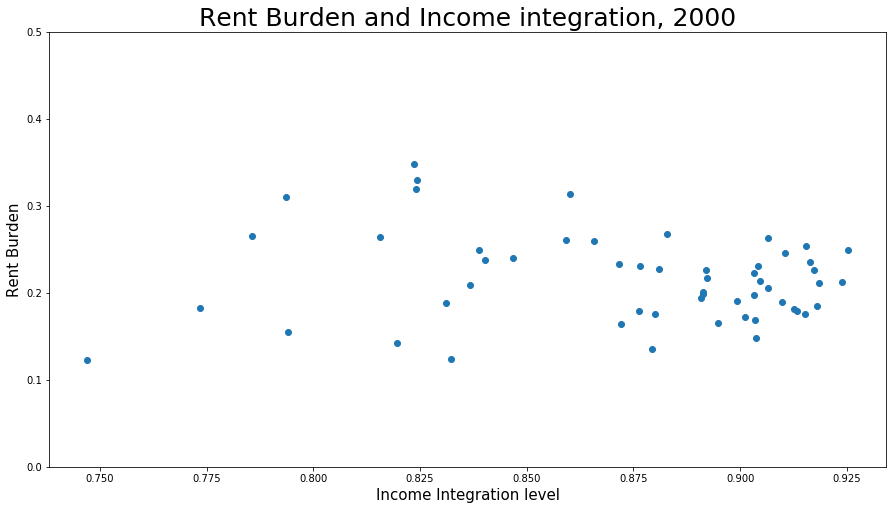

In [64]:
plt.figure(figsize = (15, 8))

plt.plot(df_ingn_brdn['entropy_index_0'],df_ingn_brdn['rent_income_ratio_0'], 'o')
plt.ylim(0,0.5)
plt.xlabel('Income Integration level', fontsize = 15)
plt.ylabel('Rent Burden', fontsize = 15)
plt.title('Rent Burden and Income integration, 2000', fontsize = 25)
plt.yticks()

In [65]:
# regression of the above -- ave of 1990, 2000, 2010

## *** Dana's note: Why median entropy? we don't care about median *** We can do this for all neighborhoods, 3 years bars next to each other

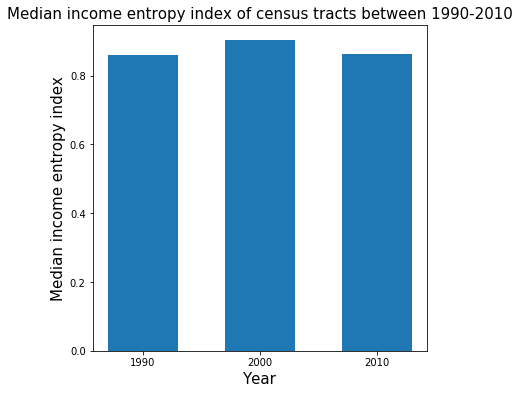

In [66]:
plt.figure(figsize = (6, 6))
plt.bar(np.arange(3), df_census_entropy.median()[-3:], width = 0.6)

plt.xticks(np.arange(3), ('1990','2000','2010'))
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Median income entropy index', fontsize = 15)
plt.title('Median income entropy index of census tracts between 1990-2010', fontsize = 15)

## 3) Combine entropy index and rent growth


In [67]:
sum(np.array(df_census_entropy == 0))

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
       12532,  2048,  1024])

In [68]:
## delete the observation with 0 entropy index
df_census_entropy1 = df_census_entropy[~((df_census_entropy.entropy_index_9 == 0)| (df_census_entropy.entropy_index_0 == 0)|\
                          (df_census_entropy.entropy_index_1 == 0))]

df_census_entropy1.shape, sum(np.array(df_census_entropy1 == 0))

((6322719, 12), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

## This is the Table on Census tract level for entropy index and rent growth!

In [69]:
df_census_entropy_rent = df_census_entropy1.merge(df2.loc[:,['census_tract','rent_growth_90_00',
                                                             'rent_growth_00_10']], 
                                                  on = 'census_tract' )
    

df_census_entropy_rent.head()

,census_tract,Borough,PUMA,NTA_Name_y,NTA_Code,NTA_Name_x,lat,lon,ZCTA5,entropy_index_9,entropy_index_0,entropy_index_1,rent_growth_90_00,rent_growth_00_10
0,36005000200,Bronx,3709,North Riverdale-Fieldston-Riverdale,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473,NaN,NaN,NaN,0.983827,1.743836
1,36005000200,Bronx,3709,North Riverdale-Fieldston-Riverdale,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473,0.922469,0.871427,0.894048,0.983827,1.743836
2,36005000200,Bronx,3709,North Riverdale-Fieldston-Riverdale,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473,0.922469,0.871427,0.894048,0.983827,1.743836
3,36005000200,Bronx,3709,North Riverdale-Fieldston-Riverdale,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473,0.922469,0.871427,0.894048,0.983827,1.743836
4,36005000200,Bronx,3709,North Riverdale-Fieldston-Riverdale,BX09,Soundview-Castle Hill-Clason Point-Harding Park,40.804573,-73.856859,10473,0.922469,0.871427,0.894048,0.983827,1.743836


In [70]:
df_census_entropy_rent.shape

(6322719, 14)

In [71]:
df_census_entropy_rent.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,census_tract,PUMA,lat,lon,ZCTA5,entropy_index_9,entropy_index_0,entropy_index_1,rent_growth_90_00,rent_growth_00_10
count,6.322719e+06,6.322719e+06,6.322719e+06,6.322719e+06,6.322719e+06,6.322677e+06,6.322677e+06,6.322677e+06,6.322719e+06,6.322719e+06
mean,3.605981e+10,4.017670e+03,4.070537e+01,-7.389212e+01,1.116407e+04,8.431371e-01,8.880102e-01,8.461653e-01,1.370765e+00,1.555808e+00
std,2.350017e+07,1.213307e+02,7.083244e-02,7.833156e-02,3.646816e+02,7.032647e-02,5.850289e-02,8.256312e-02,2.173629e-01,2.579567e-01
min,3.600500e+10,3.701000e+03,4.049979e+01,-7.424344e+01,1.000100e+04,1.726324e-01,3.627083e-01,1.999399e-01,6.242857e-01,3.265993e-01
25%,3.604704e+10,4.006000e+03,4.065593e+01,-7.395037e+01,1.120700e+04,NaN,NaN,NaN,1.261430e+00,1.418848e+00
50%,3.606101e+10,4.017000e+03,4.069829e+01,-7.390241e+01,1.123100e+04,NaN,NaN,NaN,1.363431e+00,1.531574e+00
75%,3.608105e+10,4.107000e+03,4.075011e+01,-7.383439e+01,1.137700e+04,NaN,NaN,NaN,1.467442e+00,1.660131e+00
max,3.608503e+10,4.114000e+03,4.090967e+01,-7.370461e+01,1.169700e+04,9.625608e-01,9.780501e-01,9.793746e-01,4.547727e+00,4.600000e+00


## 4) OLS regression between rent growth and entropy index, on census tract level

In [72]:
lm1 = smf.ols('rent_growth_90_00 ~ entropy_index_9', df_census_entropy_rent).fit()
lm2 = smf.ols('rent_growth_00_10 ~ entropy_index_0', df_census_entropy_rent).fit()

In [73]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      rent_growth_90_00   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5602.
Date:                Fri, 17 Nov 2017   Prob (F-statistic):               0.00
Time:                        09:51:36   Log-Likelihood:             6.8094e+05
No. Observations:             6322677   AIC:                        -1.362e+06
Df Residuals:                 6322675   BIC:                        -1.362e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           1.4483      0.001   1393.267      0.000         1.446     1.450
entropy_index_9    -0.0920      0.001    -74.847      0.000        -0.094    -0.090
==============================================================================
Omnibus:                  3084529.002   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         71371017.293
Skew:                           1.839   Prob(JB):                         0.00
Kurtosis:                      19.043   Cond. No.                         24.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      rent_growth_00_10   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                 3.441e+04
Date:                Fri, 17 Nov 2017   Prob (F-statistic):               0.00
Time:                        09:51:38   Log-Likelihood:            -3.8734e+05
No. Observations:             6322677   AIC:                         7.747e+05
Df Residuals:                 6322675   BIC:                         7.747e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           1.8439      0.002   1184.770      0.000         1.841     1.847
entropy_index_0    -0.3244      0.002   -185.502      0.000        -0.328    -0.321
==============================================================================
Omnibus:                  1871018.215   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18729245.138
Skew:                           1.136   Prob(JB):                         0.00
Kurtosis:                      11.120   Cond. No.                         30.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. Analysis based on PUMA neighborhoods

### 1） the whole view

In [75]:
# the census tracts' median value of entropy index and rent growth
df_puma_median = df_census_entropy_rent.groupby(by = 'PUMA').median().iloc[:,-5:]
df_puma_median.head()

,entropy_index_9,entropy_index_0,entropy_index_1,rent_growth_90_00,rent_growth_00_10
PUMA,,,,,
3701,0.872680,0.893574,0.817017,1.434646,1.493617
3702,0.840885,0.900094,0.861965,1.356505,1.483344
3703,0.861089,0.913321,0.875237,1.342715,1.522135
3704,0.864330,0.902503,0.850050,1.395233,1.490328
3705,0.751176,0.810493,0.836372,1.399340,1.583062


In [76]:
df_puma_median.shape 

(55, 5)

In [77]:
df_puma_family_income = df_family_income.groupby(by = 'PUMA').sum()\
                                        .drop(['census_tract'], axis = 1)
df_puma_family_income.head()

,fam_inc_109,fam_inc_159,fam_inc_209,fam_inc_259,fam_inc_309,fam_inc_359,fam_inc_409,fam_inc_499,fam_inc_609,fam_inc_759,...,fam_inc_401,fam_inc_451,fam_inc_501,fam_inc_601,fam_inc_751,fam_inc_1001,fam_inc_1251,fam_inc_1501,fam_inc_2001,fam_inc_max_201
PUMA,,,,,,,,,,,,,,,,,,,,,
3701,63504,34356,36036,29022,31206,74298,75138,130326,96432,112224,...,46452,43386,36750,83874,104160,126126,102480,57078,56700,80766
3702,60060,35322,44436,45024,46914,87612,90300,168924,137172,124614,...,75306,57750,64302,115878,154014,214872,122976,61236,62076,20790
3703,40362,30114,41118,36708,32550,85554,92022,160734,127470,153636,...,53592,58212,48468,81984,128982,189588,133224,86898,64050,34692
3704,69552,35952,42546,40698,48678,85470,72450,141246,103194,116886,...,56448,58968,58086,112560,148974,170142,107730,61026,48426,21714
3705,221340,53466,52710,53340,32340,66948,43218,66990,37422,26040,...,89628,60396,57708,84252,86268,82992,36750,15246,8022,1554


In [78]:
df_puma_family_income.shape

(55, 46)

### We have 55 PUMAs for analysis.

## 2) Calculation of PUMA entropy index of 1990, 2000 and 2010

In [79]:

for i in df_puma_family_income.index:
    df_puma_family_income.loc[i,'entropy_index_9'] = \
                    entropy_index(list(df_puma_family_income.loc[i,'fam_inc_109':'fam_inc_max_9']))
    df_puma_family_income.loc[i,'entropy_index_0'] = \
                    entropy_index(list(df_puma_family_income.loc[i,'fam_inc_100':'fam_inc_max_200']))
    df_puma_family_income.loc[i,'entropy_index_1'] = \
                    entropy_index(list(df_puma_family_income.loc[i,'fam_inc_101':'fam_inc_max_201']))

In [80]:
df_puma_entropy = df_puma_family_income.loc[:, ['entropy_index_9',
                                           'entropy_index_0',
                                           'entropy_index_1']]
df_puma_entropy.head()

,entropy_index_9,entropy_index_0,entropy_index_1
PUMA,,,
3701,NaN,0.971912,0.971036
3702,0.914075,0.952123,0.956327
3703,0.905603,0.938712,0.945460
3704,0.927587,0.952514,0.958739
3705,0.820355,0.831354,0.896695


In [81]:
df_puma_entropy.shape

(55, 3)

## 3) Combine PUMA entropy index and rent growth

In [82]:

df_puma_entropy_rent = pd.concat([df_puma_entropy, 
                df_puma_median.loc[:,['rent_growth_90_00','rent_growth_00_10']]],
                                axis = 1)
df_puma_entropy_rent.head()

,entropy_index_9,entropy_index_0,entropy_index_1,rent_growth_90_00,rent_growth_00_10
PUMA,,,,,
3701,NaN,0.971912,0.971036,1.434646,1.493617
3702,0.914075,0.952123,0.956327,1.356505,1.483344
3703,0.905603,0.938712,0.945460,1.342715,1.522135
3704,0.927587,0.952514,0.958739,1.395233,1.490328
3705,0.820355,0.831354,0.896695,1.399340,1.583062


## This is the Table on PUMA level for entropy index and rent growth!

In [83]:
df_puma_entropy_rent = df_puma_entropy_rent.reset_index()

In [84]:
df_puma_entropy_rent.head()

,PUMA,entropy_index_9,entropy_index_0,entropy_index_1,rent_growth_90_00,rent_growth_00_10
0,3701,NaN,0.971912,0.971036,1.434646,1.493617
1,3702,0.914075,0.952123,0.956327,1.356505,1.483344
2,3703,0.905603,0.938712,0.945460,1.342715,1.522135
3,3704,0.927587,0.952514,0.958739,1.395233,1.490328
4,3705,0.820355,0.831354,0.896695,1.399340,1.583062


In [85]:
df_PUMA = df_PUMA.reset_index()

In [86]:
df_PUMA.columns = ['index', 'PUMA', 'PUMA_CommunityDistrict']
df_PUMA.head()

,index,PUMA,PUMA_CommunityDistrict
0,0,3701,BX Community District 8
1,1,3702,BX Community District 12
2,2,3703,BX Community District 10
3,3,3704,BX Community District 11
4,4,3705,BX Community Districts 3 & 6


In [87]:
df_puma_entropy_rent = df_PUMA.merge(df_puma_entropy_rent, on = 'PUMA')
df_puma_entropy_rent

,index,PUMA,PUMA_CommunityDistrict,entropy_index_9,entropy_index_0,entropy_index_1,rent_growth_90_00,rent_growth_00_10
0,0,3701,BX Community District 8,NaN,0.971912,0.971036,1.434646,1.493617
1,1,3702,BX Community District 12,0.914075,0.952123,0.956327,1.356505,1.483344
2,2,3703,BX Community District 10,0.905603,0.938712,0.945460,1.342715,1.522135
3,3,3704,BX Community District 11,0.927587,0.952514,0.958739,1.395233,1.490328
4,4,3705,BX Community Districts 3 & 6,0.820355,0.831354,0.896695,1.399340,1.583062
5,5,3706,BX Community District 7,0.888255,0.895277,0.940873,1.431044,1.444079
6,6,3707,BX Community District 5,0.823367,0.850516,0.910264,1.368421,1.541534
7,7,3708,BX Community District 4,0.866420,0.854337,0.925938,1.392936,1.503703
8,8,3709,BX Community District 9,0.911087,0.914658,0.964968,1.384615,1.519779
9,9,3710,BX Community Districts 1 & 2,0.775501,0.828306,0.900102,1.237976,1.703100


In [88]:
df_puma_entropy_rent.shape

(55, 8)

In [89]:
df_puma_entropy_rent.describe()

,index,PUMA,entropy_index_9,entropy_index_0,entropy_index_1,rent_growth_90_00,rent_growth_00_10
count,55.00000,55.000000,54.000000,55.000000,55.000000,55.000000,55.000000
mean,27.00000,3936.218182,0.903627,0.926655,0.936620,1.406098,1.538570
std,16.02082,149.997616,0.038077,0.041904,0.058821,0.125154,0.091435
min,0.00000,3701.000000,0.775501,0.799350,0.704571,1.200278,1.413202
25%,13.50000,3804.500000,NaN,0.900103,0.930343,1.341770,1.481341
50%,27.00000,4005.000000,NaN,0.945421,0.957218,1.394531,1.520751
75%,40.50000,4059.500000,NaN,0.955290,0.972830,1.432845,1.575999
max,54.00000,4114.000000,0.966913,0.973947,0.981136,1.823978,1.821794


In [90]:
df_puma_entropy_rent['entropy_ave'] = ((df_puma_entropy_rent.entropy_index_9)+\
                                       (df_puma_entropy_rent.entropy_index_0)+\
                                       (df_puma_entropy_rent.entropy_index_1))/3
df_puma_entropy_rent.head()

,index,PUMA,PUMA_CommunityDistrict,entropy_index_9,entropy_index_0,entropy_index_1,rent_growth_90_00,rent_growth_00_10,entropy_ave
0,0,3701,BX Community District 8,NaN,0.971912,0.971036,1.434646,1.493617,NaN
1,1,3702,BX Community District 12,0.914075,0.952123,0.956327,1.356505,1.483344,0.940842
2,2,3703,BX Community District 10,0.905603,0.938712,0.945460,1.342715,1.522135,0.929925
3,3,3704,BX Community District 11,0.927587,0.952514,0.958739,1.395233,1.490328,0.946280
4,4,3705,BX Community Districts 3 & 6,0.820355,0.831354,0.896695,1.399340,1.583062,0.849468


## 4) Have a look at the PUMA entropy index

The median values of income entropy index of PUMAs in 1999, 2000 and 2010 are respectively 4005.0, 0.912 and 0.945.


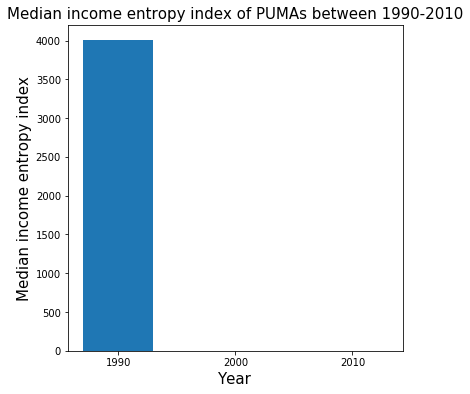

In [91]:
plt.figure(figsize = (6, 6))
plt.bar(np.arange(3), df_puma_entropy_rent.median()[1:4], width = 0.6)

plt.xticks(np.arange(3), ('1990','2000','2010'))
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Median income entropy index', fontsize = 15)
plt.title('Median income entropy index of PUMAs between 1990-2010', fontsize = 15)

print('The median values of income entropy index of PUMAs in 1999, 2000 and 2010 are respectively {}, {} and {}.'.\
      format(round(df_puma_entropy_rent.median()[1],3), 
             round(df_puma_entropy_rent.median()[2],3), 
             round(df_puma_entropy_rent.median()[3],3)))

## The income entropy index of PUMAs increased in the 20 years, meaning the level of neighborhood income integration in total has increased

### Then, we have a look at the variance of different PUMA's entropy index and their change in 20 years

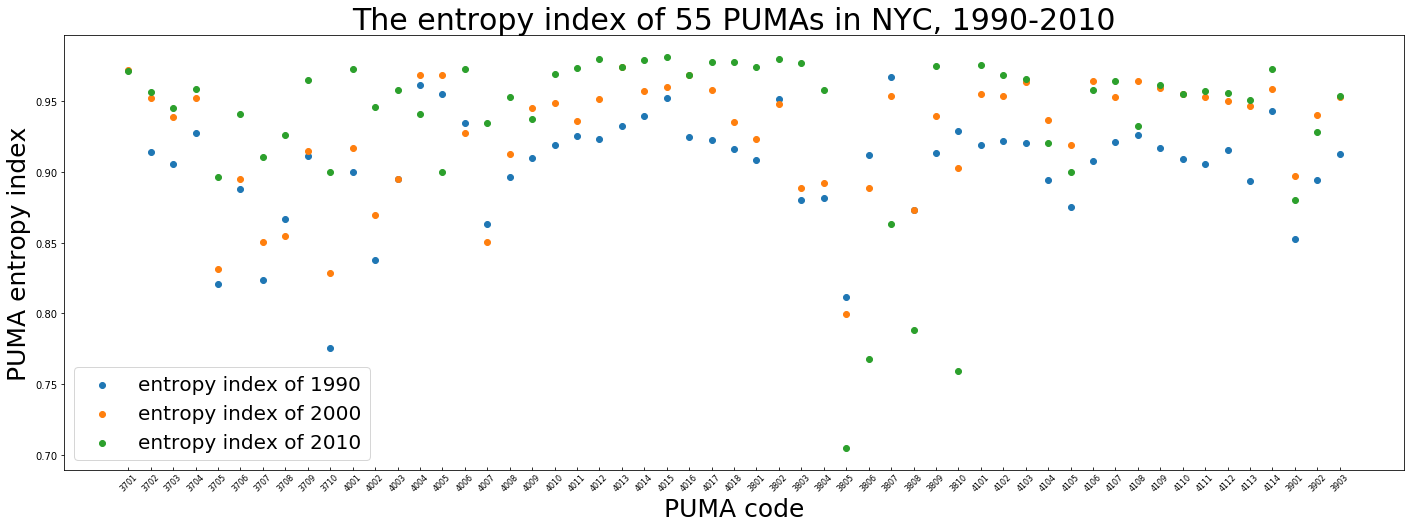

In [92]:
## to see the distribution of entropy index
plt.figure(figsize = (24, 8))
plt.scatter(np.arange(len(df_puma_entropy_rent)),df_puma_entropy_rent.entropy_index_9,
           label = 'entropy index of 1990')
plt.scatter(np.arange(len(df_puma_entropy_rent)),df_puma_entropy_rent.entropy_index_0,
           label = 'entropy index of 2000')
plt.scatter(np.arange(len(df_puma_entropy_rent)),df_puma_entropy_rent.entropy_index_1,
           label = 'entropy index of 2010')
plt.legend(fontsize = 20)

plt.xticks(np.arange(len(df_puma_entropy_rent)), df_puma_entropy_rent.PUMA, rotation = 45, fontsize = 30)
plt.tick_params(axis='x', pad = 2, labelsize = 8, direction = 'in')
plt.ylabel('PUMA entropy index', fontsize = 25)
plt.xlabel('PUMA code', fontsize = 25)
plt.title('The entropy index of 55 PUMAs in NYC, 1990-2010', fontsize = 30)
plt.show()

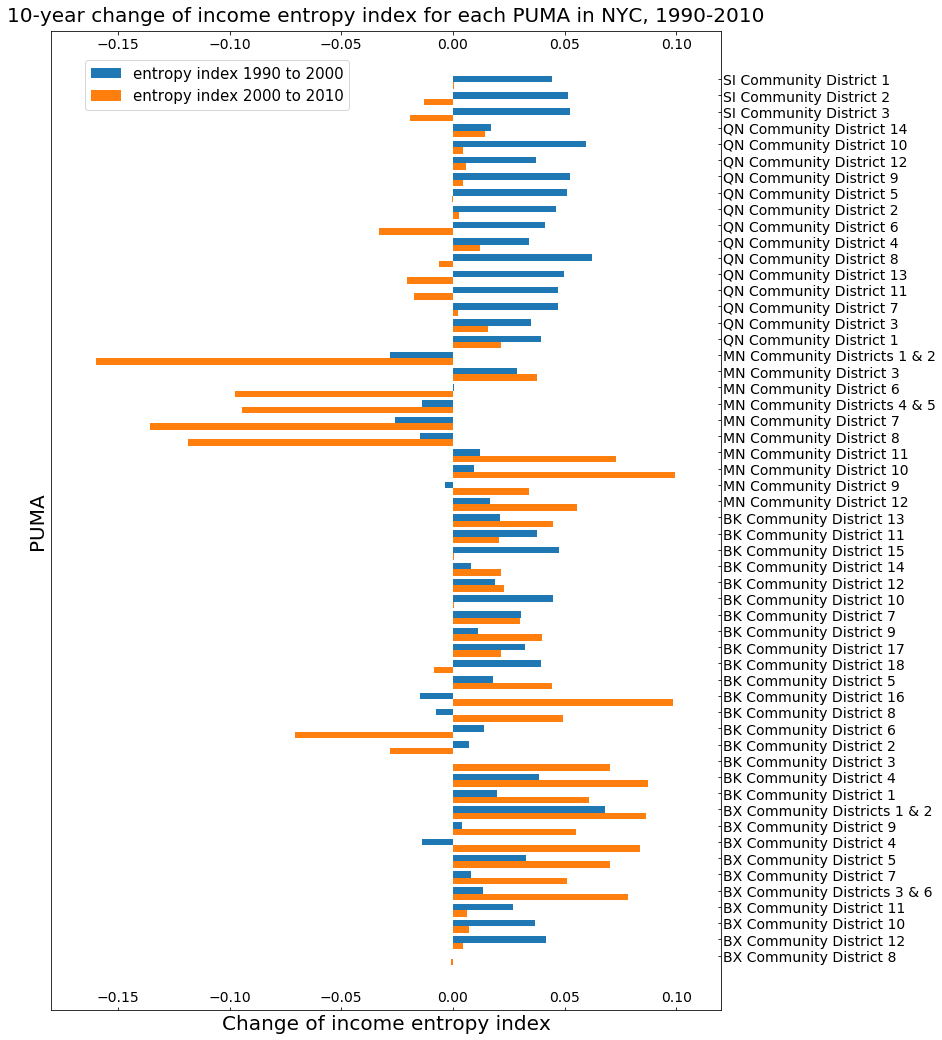

In [93]:
## To see the change of entropy index in the PUMAs
plt.figure(figsize = (12,18))
plt.barh(np.arange(len(df_puma_entropy_rent)), 
         width = df_puma_entropy_rent.entropy_index_0/df_puma_entropy_rent.entropy_index_9 - 1,
        height = 0.4, label = 'entropy index 1990 to 2000')
plt.barh(np.arange(len(df_puma_entropy_rent)) - 0.4, 
         width = df_puma_entropy_rent.entropy_index_1/df_puma_entropy_rent.entropy_index_0 - 1,
        height = 0.4, label = 'entropy index 2000 to 2010')
plt.xlim((-0.18,0.12))
plt.tick_params(axis='x', pad= -20, labelsize=14, direction = 'in', 
                top = True, bottom = True, labeltop= True, labelbottom = True)
plt.yticks(np.arange(len(df_puma_entropy_rent)),df_puma_entropy_rent.PUMA_CommunityDistrict )
plt.tick_params(axis='y', pad=2, labelsize=14, direction = 'in', 
               left = False, right = True, labelleft = False, labelright = True)

plt.ylabel('PUMA',fontsize = 20)
plt.xlabel('Change of income entropy index', fontsize = 20)
plt.title('10-year change of income entropy index for each PUMA in NYC, 1990-2010',fontsize = 20,
         verticalalignment='bottom')

plt.legend(loc = (0.05, 0.92), fontsize = 15)
plt.show()

## Fig.3 Change of income Integration (entropy index)
If we look at different PUMAs, the change of income entropy index varies, especially in Manhattan and Brooklyn.

In Manhattan, most of the entropy index continued to decrease in 20 years, even getting worse in the latter decade.

On the contrary, in brooklyn, most of the entropy index continued to increase in 20 years, with greater growth rate in the latter decade.

___

(array([-0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12]),
 <a list of 9 Text yticklabel objects>)

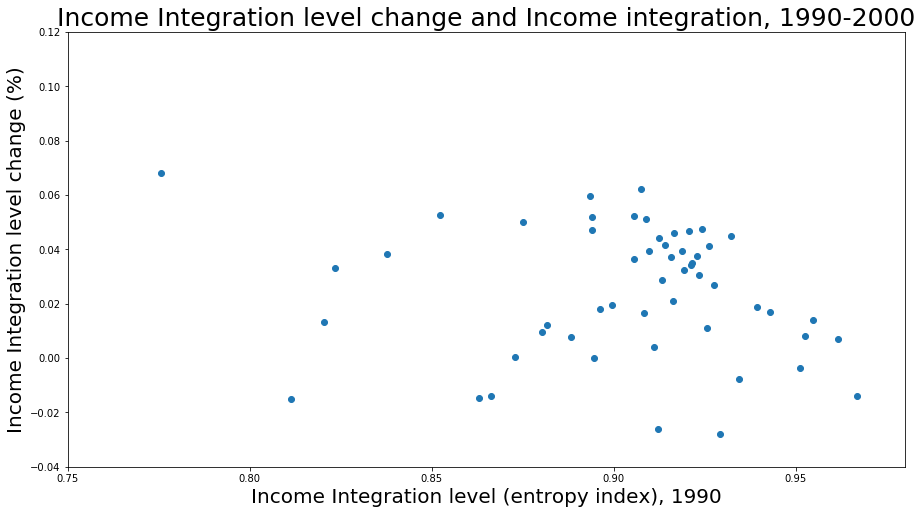

In [94]:
plt.figure(figsize = (15, 8))
plt.plot(df_puma_entropy_rent.entropy_index_9, df_puma_entropy_rent.entropy_index_0/df_puma_entropy_rent.entropy_index_9 - 1, 'o')
plt.ylim(-0.04,0.12)
plt.xlim(0.75,0.98)
plt.xlabel('Income Integration level (entropy index), 1990', fontsize = 20)
plt.ylabel('Income Integration level change (%)', fontsize = 20)
plt.title('Income Integration level change and Income integration, 1990-2000', fontsize = 25)
plt.yticks()

(array([-0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12]),
 <a list of 9 Text yticklabel objects>)

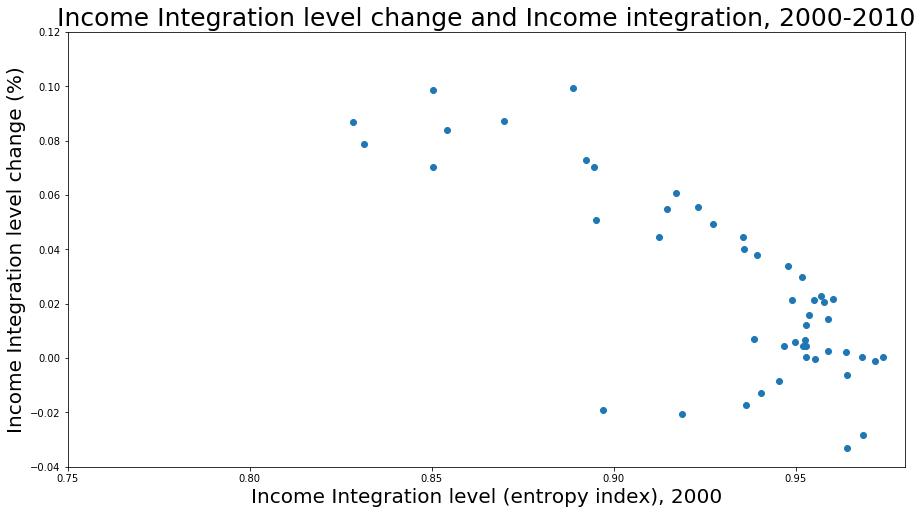

In [95]:
plt.figure(figsize = (15, 8))
plt.plot(df_puma_entropy_rent.entropy_index_0, df_puma_entropy_rent.entropy_index_1/df_puma_entropy_rent.entropy_index_0 - 1, 'o')
plt.ylim(-0.04,0.12)
plt.xlim(0.75,0.98)
plt.xlabel('Income Integration level (entropy index), 2000', fontsize = 20)
plt.ylabel('Income Integration level change (%)', fontsize = 20)
plt.title('Income Integration level change and Income integration, 2000-2010', fontsize = 25)
plt.yticks()

## 5) OLS regression between rent growth and entropy index, on PUMA level

In [96]:
lm1_puma = smf.ols('rent_growth_90_00 ~ entropy_index_9', df_puma_entropy_rent).fit()
lm2_puma = smf.ols('rent_growth_00_10 ~ entropy_index_0', df_puma_entropy_rent).fit()

In [97]:
lm1_puma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      rent_growth_90_00   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     2.328
Date:                Fri, 17 Nov 2017   Prob (F-statistic):              0.133
Time:                        09:51:45   Log-Likelihood:                 36.810
No. Observations:                  54   AIC:                            -69.62
Df Residuals:                      52   BIC:                            -65.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           0.7852      0.407      1.930      0.059        -0.031     1.602
entropy_index_9     0.6865      0.450      1.526      0.133        -0.216     1.589
==============================================================================
Omnibus:                       16.855   Durbin-Watson:                   0.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.191
Skew:                           1.246   Prob(JB):                     4.13e-05
Kurtosis:                       4.663   Cond. No.                         48.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
lm2_puma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      rent_growth_00_10   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.1411
Date:                Fri, 17 Nov 2017   Prob (F-statistic):              0.709
Time:                        09:51:45   Log-Likelihood:                 54.103
No. Observations:                  55   AIC:                            -104.2
Df Residuals:                      53   BIC:                            -100.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           1.6428      0.278      5.917      0.000         1.086     2.200
entropy_index_0    -0.1125      0.299     -0.376      0.709        -0.713     0.488
==============================================================================
Omnibus:                       15.934   Durbin-Watson:                   1.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.507
Skew:                           1.197   Prob(JB):                     9.58e-05
Kurtosis:                       4.532   Cond. No.                         44.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ValueError: x and y must have same first dimension, but have shapes (55,) and (54,)

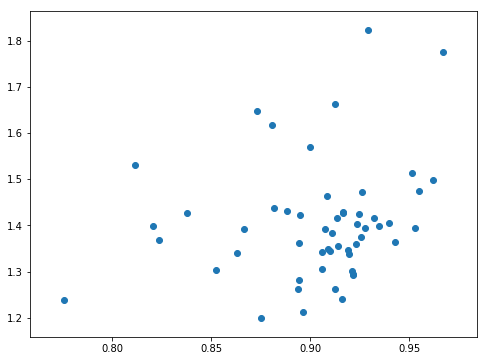

In [99]:
plt.figure(figsize = (8, 6))

plt.scatter(df_puma_entropy_rent.entropy_index_9, df_puma_entropy_rent.rent_growth_90_00)
plt.plot(df_puma_entropy_rent.entropy_index_9, lm1_puma.predict(), c = 'r')
plt.xlabel('PUMA entropy index in 1990', fontsize = 15)
plt.ylabel('Rent growth from 1990 to 2000', fontsize = 15)
plt.title('Relationship between entropy index and rent growth of PUMAs in NYC, 1990-2000',
         fontsize = 15)

print('Rent_growth_90to00 = {} + {} * PUMA_Entropy_Index_90, R-squared = {}'.format(\
                round(lm1_puma.params[0],3), round(lm1_puma.params[1],3),round(lm1_puma.rsquared,3)))

Rent_growth_00to10 = 1.643 + -0.112 * PUMA_Entropy_Index_00, R-squared = 0.003


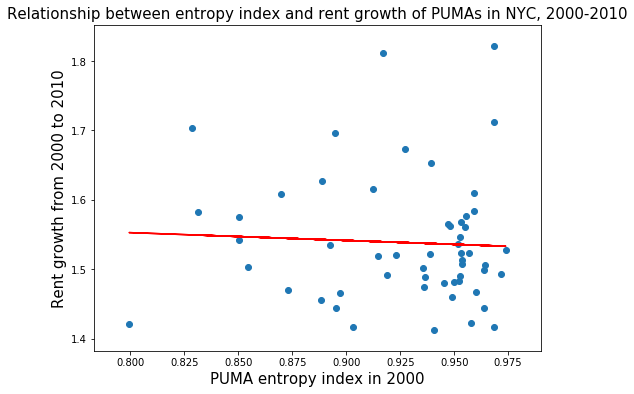

In [100]:
plt.figure(figsize = (8, 6))
plt.scatter(df_puma_entropy_rent.entropy_index_0, df_puma_entropy_rent.rent_growth_00_10)
plt.plot(df_puma_entropy_rent.entropy_index_0, lm2_puma.predict(), c = 'r')
plt.xlabel('PUMA entropy index in 2000', fontsize = 15)
plt.ylabel('Rent growth from 2000 to 2010', fontsize = 15)
plt.title('Relationship between entropy index and rent growth of PUMAs in NYC, 2000-2010',
         fontsize = 15)

print('Rent_growth_00to10 = {} + {} * PUMA_Entropy_Index_00, R-squared = {}'.format(\
                round(lm2_puma.params[0],3), round(lm2_puma.params[1],3),round(lm2_puma.rsquared,3)))

In [101]:
import requests
from IPython.display import HTML
import geopandas as gpd
from fiona.crs import from_epsg
import seaborn
%pylab inline


#New York Shapefile - download from https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u  
nyPUMA = gpd.GeoDataFrame.from_file("geo_export_9d5e915d-5541-496f-aa78-729be821f5c7.shp")
nyPUMA.crs = from_epsg(2263) 
nyPUMA.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Populating the interactive namespace from numpy and matplotlib


,puma,shape_leng,shape_area,geometry
0,3701,53227.144376,9.792852e+07,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,106050.008344,1.889860e+08,POLYGON ((-73.86477258283533 40.90201244187379...
2,3703,304875.033427,2.670770e+08,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,47970.900868,1.062129e+08,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,3705,68593.066759,1.224946e+08,POLYGON ((-73.87045508990893 40.86663286876232...


In [102]:
nyPUMA.dtypes

puma           object
shape_leng    float64
shape_area    float64
geometry       object
dtype: object

## Mapping Income Integration (entropy index) by PUMA, 1990-2000-2010

In [106]:
nyPUMA.dropna(0)

,puma,shape_leng,shape_area,geometry
0,3701,53227.144376,9.792852e+07,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,106050.008344,1.889860e+08,POLYGON ((-73.86477258283533 40.90201244187379...
2,3703,304875.033427,2.670770e+08,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,47970.900868,1.062129e+08,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,3705,68593.066759,1.224946e+08,POLYGON ((-73.87045508990893 40.86663286876232...
5,3706,51799.404764,4.388687e+07,POLYGON ((-73.91328437051338 40.85961860183316...
6,3707,37347.926177,4.228113e+07,POLYGON ((-73.91328437051338 40.85961860183316...
7,3708,34853.551314,5.589653e+07,"POLYGON ((-73.92478318783078 40.8447526648105,..."
8,3709,73289.990781,1.241170e+08,(POLYGON ((-73.83667856364177 40.8175887629137...
9,3710,91116.970113,1.377977e+08,(POLYGON ((-73.89680883223774 40.7958084451597...


In [ ]:
#Changing zip code from object type to integar 
nyPUMA.puma = nyPUMA.puma.astype(int)


#Merge shapefile dataframe with whatever dataframe you're trying to plot 
df_map = pd.merge(nyPUMA, df_puma_entropy_rent, left_on='puma', right_on='PUMA')
df_map.head()

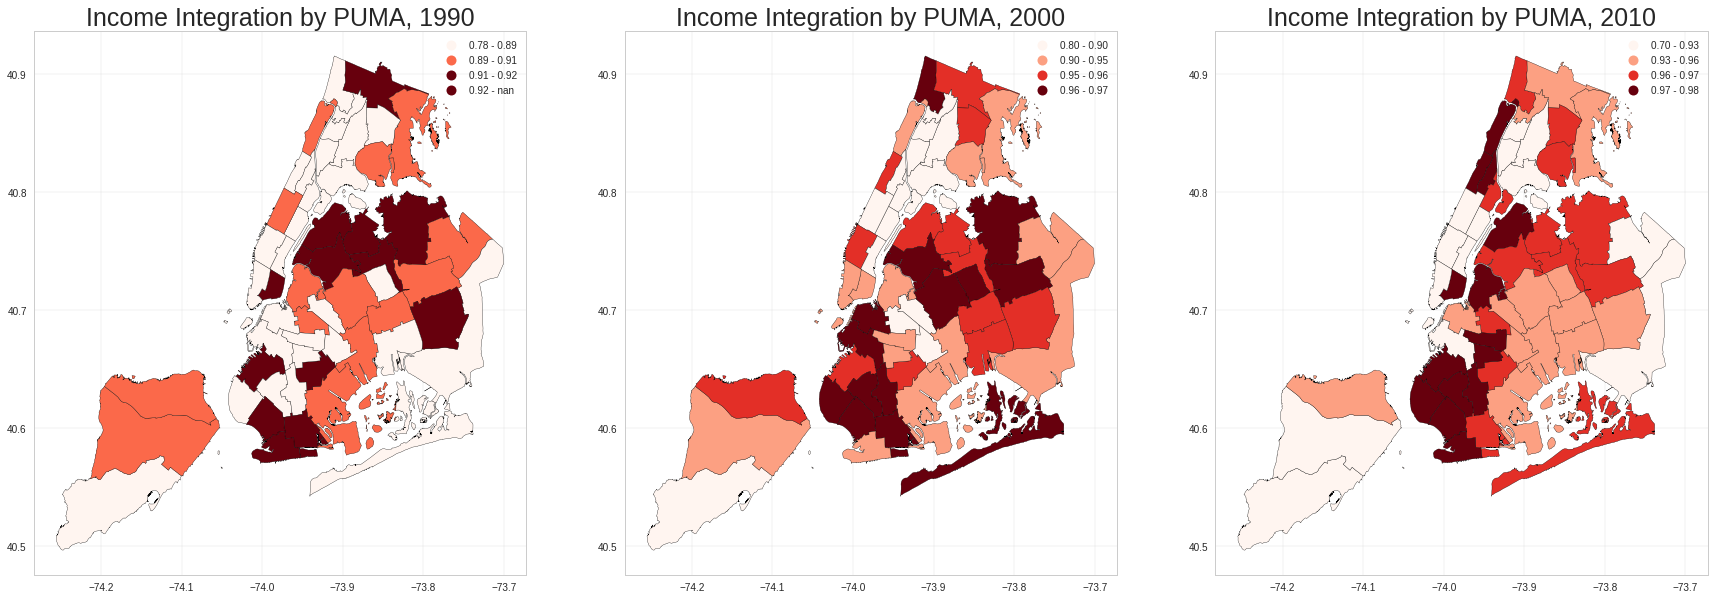

In [116]:
#Now plot it! 
fig = plt.figure(figsize = (30,10))
seaborn.set_style("whitegrid")

ax1 = fig.add_subplot(131)
nyPUMA.plot(ax=ax1, color='black', linewidth=1, alpha=0.1)
df_map.plot(ax=ax1, column='entropy_index_9', cmap='Reds', scheme='quantiles', k=4, legend=True, edgecolor='k');
plt.title('Income Integration by PUMA, 1990', size=25)
plt.grid(linewidth=0.25)
plt.legend(fontsize=25)

ax2 = fig.add_subplot(132)
nyPUMA.plot(ax=ax2, color='black', linewidth=1, alpha=0.1)
df_map.plot(ax=ax2, column='entropy_index_0', cmap='Reds', scheme='quantiles', k=4, legend=True, edgecolor='k');
plt.title('Income Integration by PUMA, 2000', size=25)
plt.grid(linewidth=0.25)

ax3 = fig.add_subplot(133)
nyPUMA.plot(ax=ax3, color='black', linewidth=1, alpha=0.1)
df_map.plot(ax=ax3, column='entropy_index_1', cmap='Reds', scheme='quantiles', k=4, legend=True, edgecolor='k');
plt.title('Income Integration by PUMA, 2010', size=25)
plt.grid(linewidth=0.25)

## Mapping Rent Burden by PUMA, 1990-2000-2010

In [104]:
#Merge shapefile dataframe with whatever dataframe you're trying to plot 
df_map2 = pd.merge(nyPUMA, df_ingn_brdn, left_on='puma', right_on='PUMA')
df_map2.head()

,puma,shape_leng,shape_area,geometry,PUMA,census_tract,median_inc_fam_9,median_rent_9,median_inc_fam_0,median_rent_0,...,inc_growth_90_00,inc_growth_00_10,rent_growth_90_00,rent_growth_00_10,lat,lon,ZCTA5,entropy_index_9,entropy_index_0,entropy_index_1
0,3701,53227.144376,9.792852e+07,POLYGON ((-73.89641133483133 40.90450452082026...,3701,3.600503e+10,45086.111111,535.444444,56934.925926,761.222222,...,1.233558,1.327131,1.427693,1.454321,40.885093,-73.903659,10466.481481,0.870253,0.890936,0.817852
1,3702,106050.008344,1.889860e+08,POLYGON ((-73.86477258283533 40.90201244187379...,3702,3.600504e+10,39170.809524,550.285714,46532.666667,744.952381,...,1.194408,1.310304,1.363354,1.487604,40.886798,-73.853893,10467.404762,0.840920,0.891249,0.850414
2,3703,304875.033427,2.670770e+08,(POLYGON ((-73.78833349834532 40.8346671297593...,3703,3.600502e+10,45072.739130,559.565217,53895.347826,749.478261,...,1.224843,1.299647,1.339406,1.478587,40.836982,-73.821053,10465.391304,0.848810,0.903423,0.859172
3,3704,47970.900868,1.062129e+08,"POLYGON ((-73.84792614069238 40.8713422330779,...",3704,3.600503e+10,38131.875000,527.350000,44484.050000,720.775000,...,1.158262,1.452122,1.378344,1.511322,40.856651,-73.856886,10464.700000,0.852915,0.892008,0.822135
4,3705,68593.066759,1.224946e+08,POLYGON ((-73.87045508990893 40.86663286876232...,3705,3.600503e+10,13367.925000,356.050000,20199.775000,498.550000,...,1.691148,1.386329,1.414653,1.640793,40.840757,-73.891945,10458.175000,0.712305,0.793578,0.820009


In [110]:
df_map2.columns

Index([               u'puma',          u'shape_leng',          u'shape_area',
                  u'geometry',                u'PUMA',        u'census_tract',
          u'median_inc_fam_9',       u'median_rent_9',    u'median_inc_fam_0',
             u'median_rent_0',    u'median_inc_fam_1',       u'median_rent_1',
       u'rent_income_ratio_9', u'rent_income_ratio_0', u'rent_income_ratio_1',
          u'inc_growth_90_00',    u'inc_growth_00_10',   u'rent_growth_90_00',
         u'rent_growth_00_10',                 u'lat',                 u'lon',
                     u'ZCTA5',     u'entropy_index_9',     u'entropy_index_0',
           u'entropy_index_1'],
      dtype='object')

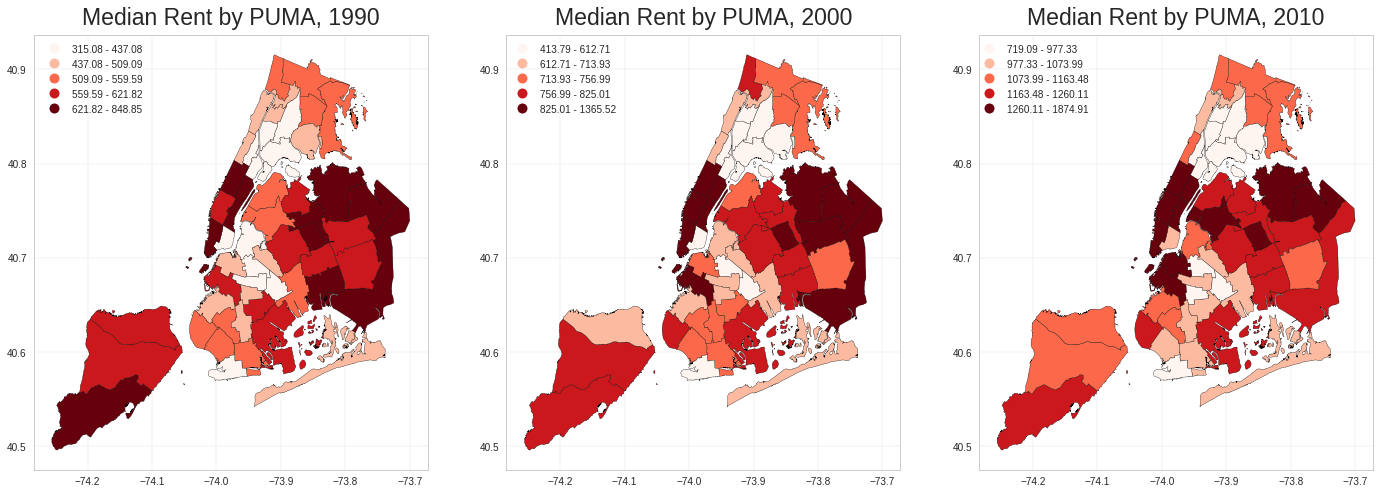

In [184]:
# Median Rent 

fig = plt.figure(figsize = (24,8))
seaborn.set_style("whitegrid")

ax1 = fig.add_subplot(131)
nyPUMA.plot(ax=ax1, color='black', linewidth=1, alpha=0.1)
df_map2.plot(ax=ax1, column='median_rent_9', cmap='Reds', scheme='Quantiles', legend=True, edgecolor='k');
plt.title('Median Rent by PUMA, 1990', size=23, y=1.01)
plt.grid(linewidth=0.25)
legend1 = ax1.get_legend()
legend1.set_bbox_to_anchor((0.1,0.8,0.2,0.2))

ax2 = fig.add_subplot(132)
nyPUMA.plot(ax=ax2, color='black', linewidth=1, alpha=0.1)
df_map2.plot(ax=ax2, column='median_rent_0', cmap='Reds', scheme='Quantiles', legend=True, edgecolor='k');
plt.title('Median Rent by PUMA, 2000', size=23, y=1.01)
plt.grid(linewidth=0.25)
legend2 = ax2.get_legend()
legend2.set_bbox_to_anchor((0.1,0.8,0.2,0.2))

ax3 = fig.add_subplot(133)
nyPUMA.plot(ax=ax3, color='black', linewidth=1, alpha=0.1)
df_map2.plot(ax=ax3, column='median_rent_1', cmap='Reds', scheme='Quantiles', legend=True, edgecolor='k');
plt.title('Median Rent by PUMA, 2010', size=23, y=1.01)
plt.grid(linewidth=0.25)
legend3 = ax3.get_legend()
legend3.set_bbox_to_anchor((0.1,0.8,0.2,0.2))

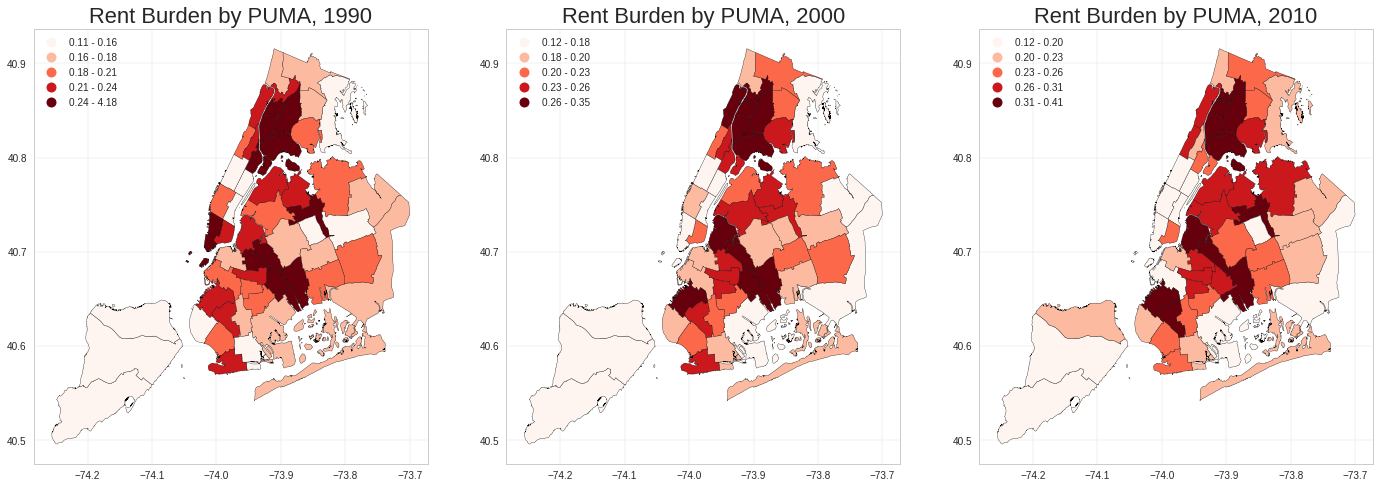

In [181]:
# Rent burden

fig = plt.figure(figsize = (24,8))
seaborn.set_style("whitegrid")

ax1 = fig.add_subplot(131)
nyPUMA.plot(ax=ax1, color='black', linewidth=1, alpha=0.1)
df_map2.plot(ax=ax1, column='rent_income_ratio_9', cmap='Reds', scheme='Quantiles', legend=True, edgecolor='k');
plt.title('Rent Burden by PUMA, 1990', size=22)
plt.grid(linewidth=0.25)
legend1 = ax1.get_legend()
legend1.set_bbox_to_anchor((0.035,0.8,0.2,0.2))

ax2 = fig.add_subplot(132)
nyPUMA.plot(ax=ax2, color='black', linewidth=1, alpha=0.1)
df_map2.plot(ax=ax2, column='rent_income_ratio_0', cmap='Reds', scheme='Quantiles', legend=True, edgecolor='k');
plt.title('Rent Burden by PUMA, 2000', size=22)
plt.grid(linewidth=0.25)
legend2 = ax2.get_legend()
legend2.set_bbox_to_anchor((0.035,0.8,0.2,0.2))

ax3 = fig.add_subplot(133)
nyPUMA.plot(ax=ax3, color='black', linewidth=1, alpha=0.1)
df_map2.plot(ax=ax3, column='rent_income_ratio_1', cmap='Reds', scheme='Quantiles', legend=True, edgecolor='k');
plt.title('Rent Burden by PUMA, 2010', size=22)
plt.grid(linewidth=0.25)
legend3 = ax3.get_legend()
legend3.set_bbox_to_anchor((0.035,0.8,0.2,0.2))

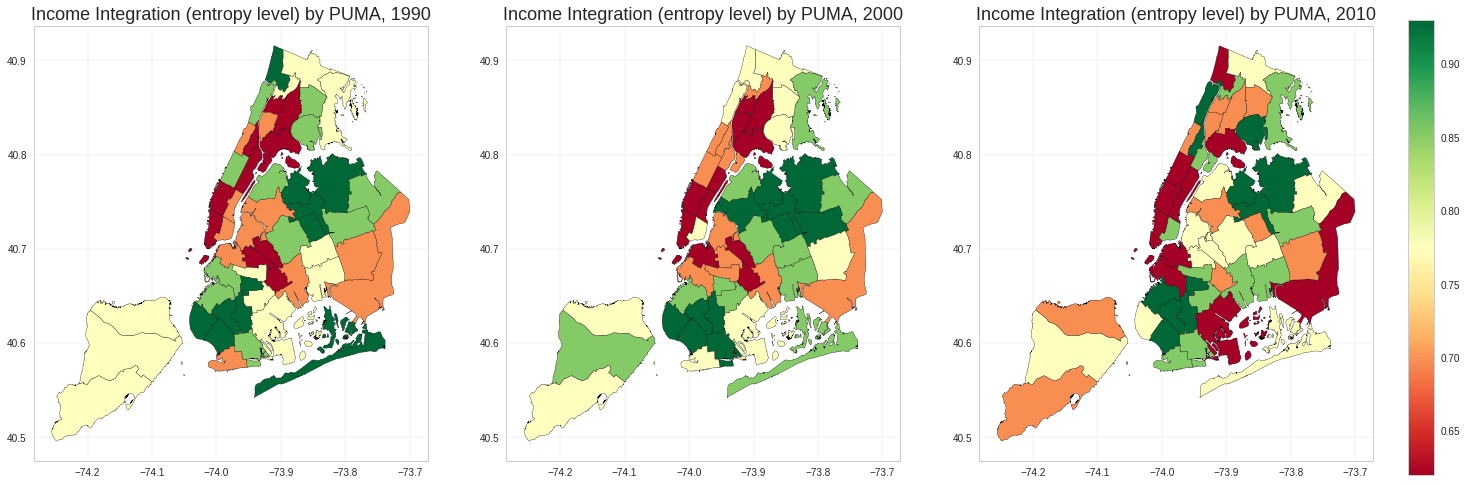

In [186]:
# Income Integration

fig = plt.figure(figsize = (24,8))
seaborn.set_style("whitegrid")
vmin, vmax = 0.62, 0.93

ax1 = fig.add_subplot(131)
nyPUMA.plot(ax=ax1, color='black', linewidth=1, alpha=0.1)
df_map2.plot(ax=ax1, column='entropy_index_9', cmap='RdYlGn', scheme='quantiles', legend=False, edgecolor='k');
plt.title('Income Integration (entropy level) by PUMA, 1990', size=18)
plt.grid(linewidth=0.25)
cax = fig.add_axes([.92, 0.1, 0.015, 0.79])
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax)

ax2 = fig.add_subplot(132)
nyPUMA.plot(ax=ax2, color='black', linewidth=1, alpha=0.1)
df_map2.plot(ax=ax2, column='entropy_index_0', cmap='RdYlGn', scheme='quantiles', legend=False, edgecolor='k');
plt.title('Income Integration (entropy level) by PUMA, 2000', size=18)
plt.grid(linewidth=0.25)

ax3 = fig.add_subplot(133)
nyPUMA.plot(ax=ax3, color='black', linewidth=1, alpha=0.1)
df_map2.plot(ax=ax3, column='entropy_index_1', cmap='RdYlGn', scheme='quantiles', legend=False, edgecolor='k');
plt.title('Income Integration (entropy level) by PUMA, 2010', size=18)
plt.grid(linewidth=0.25)

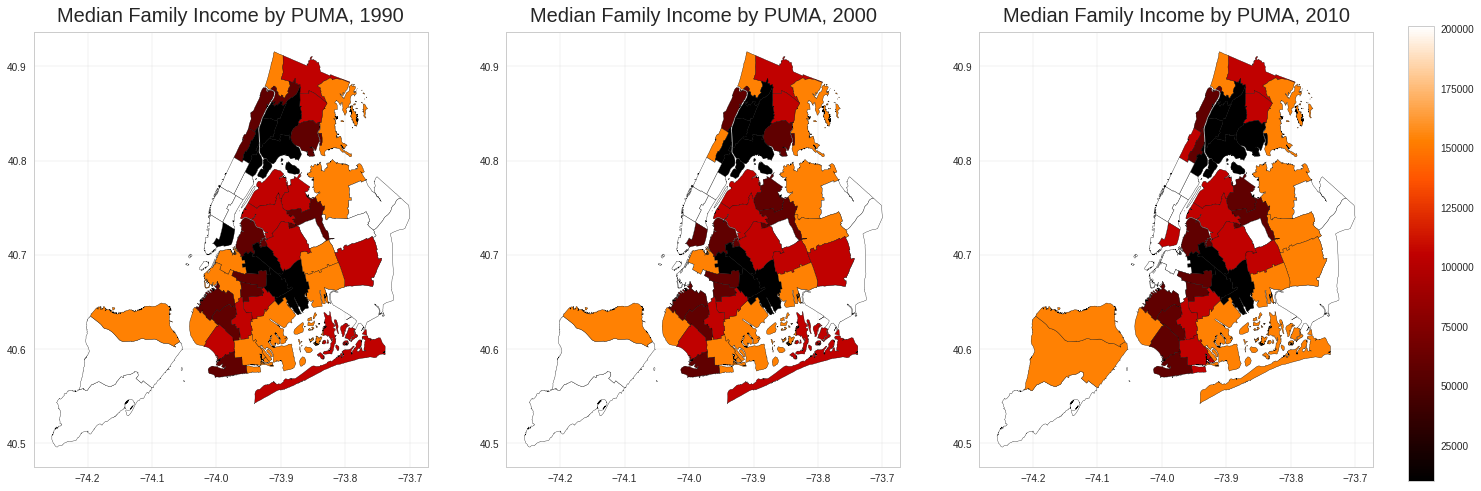

In [192]:
# Median Income 

fig = plt.figure(figsize = (24,8))
seaborn.set_style("whitegrid")
vmin, vmax = 10000, 200900

ax1 = fig.add_subplot(131)
nyPUMA.plot(ax=ax1, color='black', linewidth=1, alpha=0.1)
df_map2.plot(ax=ax1, column='median_inc_fam_9', cmap='gist_heat', scheme='quantiles', legend=False, edgecolor='k');
plt.title('Median Family Income by PUMA, 1990', size=20, y=1.01)
plt.grid(linewidth=0.25)
cax = fig.add_axes([.92, 0.1, 0.015, 0.79])
sm = plt.cm.ScalarMappable(cmap='gist_heat', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax)

ax2 = fig.add_subplot(132)
nyPUMA.plot(ax=ax2, color='black', linewidth=1, alpha=0.1)
df_map2.plot(ax=ax2, column='median_inc_fam_0', cmap='gist_heat', scheme='quantiles', legend=False, edgecolor='k');
plt.title('Median Family Income by PUMA, 2000', size=20, y=1.01)
plt.grid(linewidth=0.25)

ax3 = fig.add_subplot(133)
nyPUMA.plot(ax=ax3, color='black', linewidth=1, alpha=0.1)
df_map2.plot(ax=ax3, column='median_inc_fam_1', cmap='gist_heat', scheme='quantiles', legend=False, edgecolor='k');
plt.title('Median Family Income by PUMA, 2010', size=20, y=1.01)
plt.grid(linewidth=0.25)


In [155]:
fig.colorbar?

Object `cm.ScalarMappabl` not found.
